In [ ]:
#https://github.com/TommasoStrada/Progetto-Data-Science-Lab

In [ ]:
pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=041b577aebb24275d04f2752da408095b3df14063583fec9dfc3f9906c038645
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost
from pandasql import sqldf    #SOLO PER UNA POTENZIALITA' CHE OFFRE PANDAS E SQL. DI FATTO POSSIAMO LIMITARCI AD USARE SOLO PANDAS

In [ ]:
print("xgboost versione numero: ", xgboost.__version__)

xgboost versione numero:  0.90


In [ ]:
pysqldf = lambda q: sqldf(q,globals()) 
#prende q che sara la nostra query ed eseque sqldf insieme a delle variabili globali 
#(al posto di chiamare ogni volta sqldf e le variabili flobali creiamo una funzione che richaimiamo di volta in volta che ci serve)

In [ ]:
ts_prototipo = pd.read_csv("https://github.com/Alessandro-Fasani/DsLab/raw/main/serie-storiche-ecommerce-pulito-no-buchi-temporali.csv")
# per usare la repository di Tommaso ('./data/serie-storiche-ecommerce-pulito-no-buchi-temporali.csv')

In [ ]:
ts_prototipo.sample(5)

Unnamed: 0        data  new_index    totale  settore  Anno       Mese  \
5488         5488  2020-09-23    20584.0  53329.57   Calcio  2020  Settembre   
10090       10090  2016-09-24     8334.0   3404.70  Fitness  2016  Settembre   
794           794  2016-03-05     6530.0  20205.79    Pesca  2016      Marzo   
14680       14680  2020-12-31        NaN      0.00  Running  2020   Dicembre   
70             70  2014-03-12      274.0  22742.94    Pesca  2014      Marzo   

       Giorno  Mese (n°)  
5488       23          9  
10090      24          9  
794         5          3  
14680      31         12  
70         12          3

In [ ]:
ts = ts_prototipo[["data", "settore", "totale", "Anno", "Mese", "Giorno"]]
ts.dtypes

data        object
settore     object
totale     float64
Anno         int64
Mese        object
Giorno       int64
dtype: object

In [ ]:
#Sistemiamo i tipi
ts["settore"] = ts.settore.astype("category")
ts['data'] = pd.to_datetime(ts['data'])
ts.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


data       datetime64[ns]
settore          category
totale            float64
Anno                int64
Mese               object
Giorno              int64
dtype: object

In [ ]:
ts.sample(5)

data  settore    totale  Anno     Mese  Giorno
6592  2015-06-15   Casual  27767.57  2015   Giugno      15
6085  2014-01-24   Casual      0.00  2014  Gennaio      24
13390 2017-06-20  Running   8063.38  2017   Giugno      20
6497  2015-03-12   Casual  21073.61  2015    Marzo      12
11075 2019-06-06  Fitness   1438.73  2019   Giugno       6

In [ ]:
import logging
#logging.getLogger().setLevel(logging.CRITICAL) # Rimuoviamo le informazioni fastidiose che matplot lib stampa sull'asse X

In [ ]:
lista_settori= ts.settore.unique()
lista_settori

['Pesca', 'Calcio', 'Casual', 'Fitness', 'Running']
Categories (5, object): ['Calcio', 'Casual', 'Fitness', 'Pesca', 'Running']

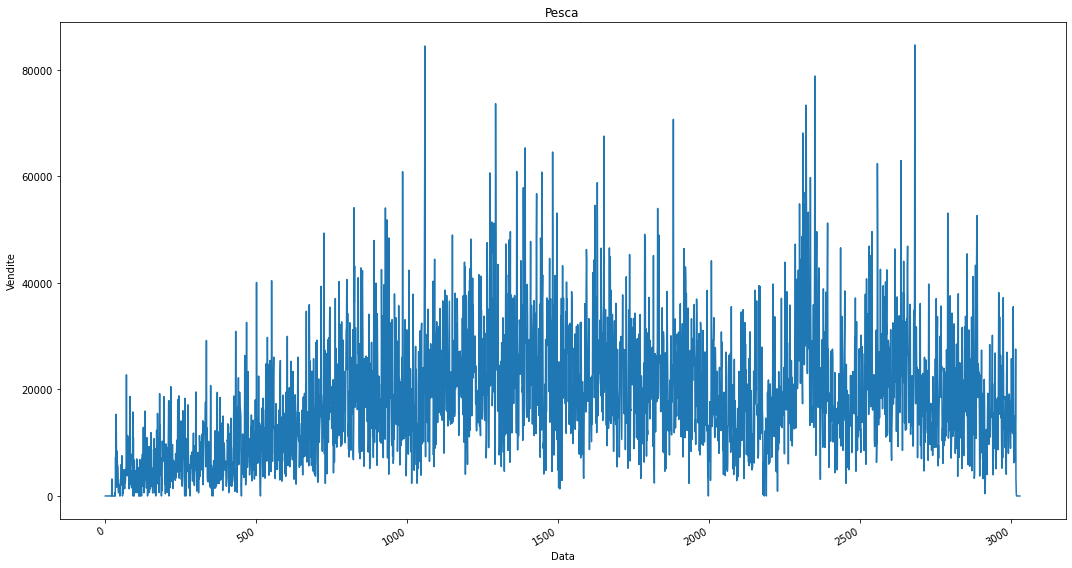

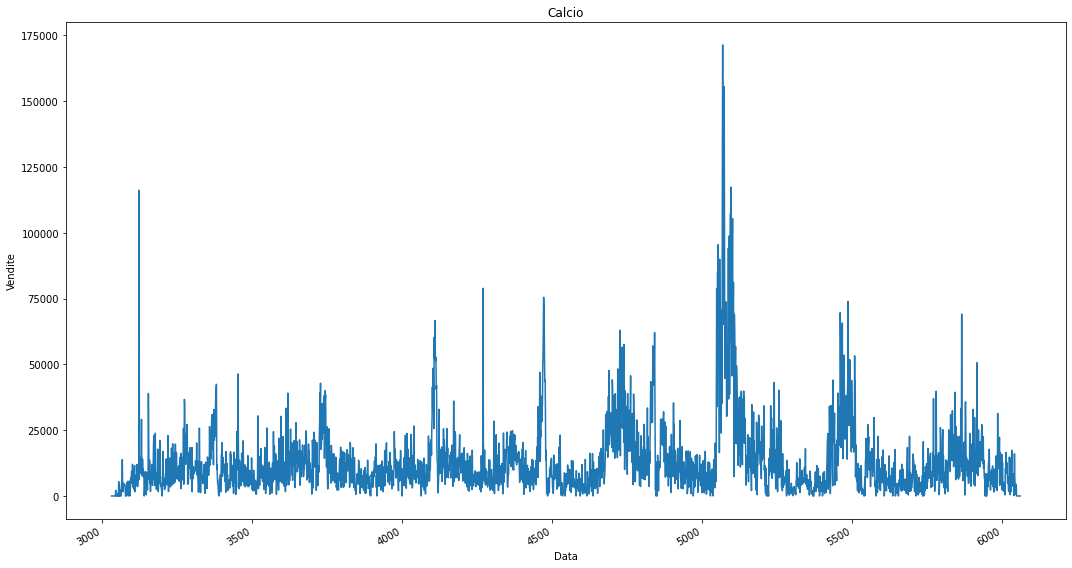

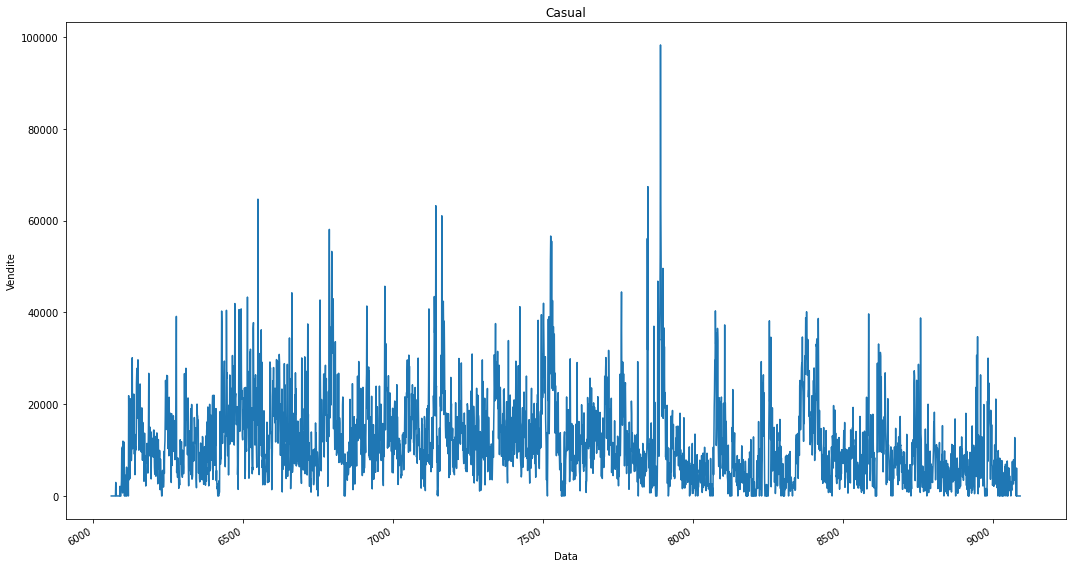

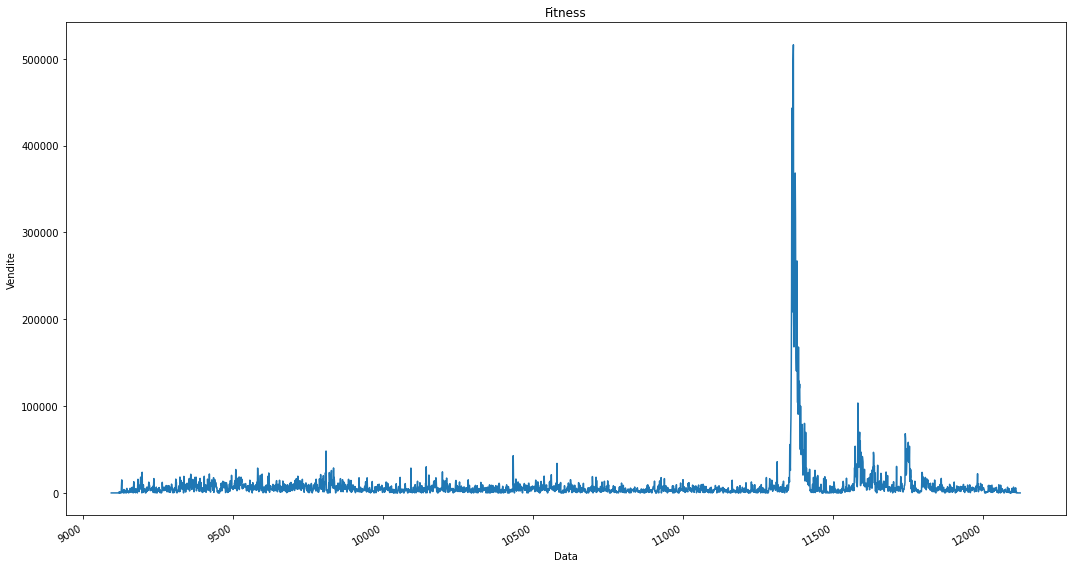

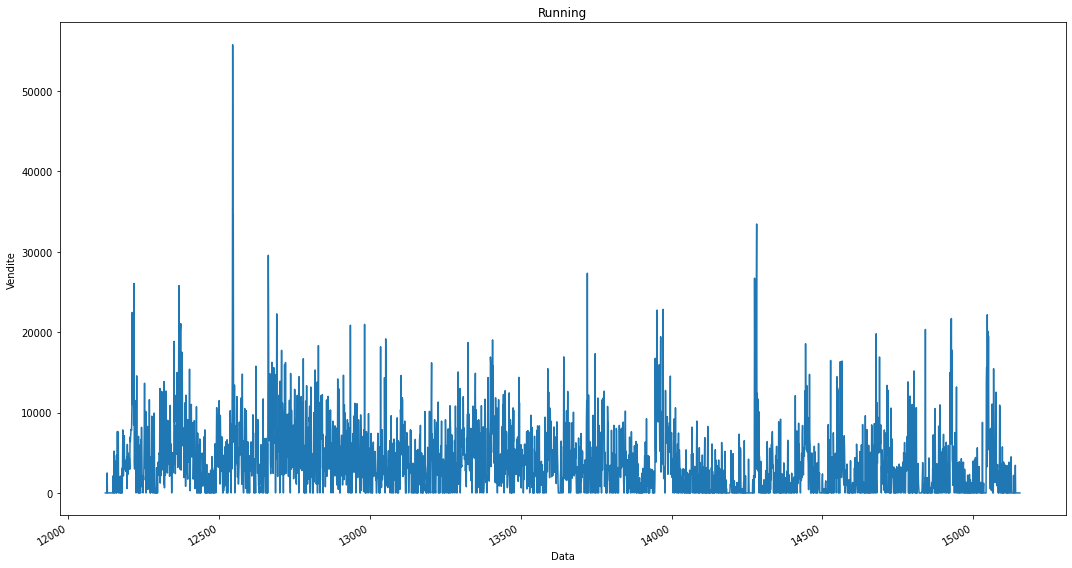

In [ ]:
for categorie in ts.settore.unique():
  fig, ax = plt.subplots(figsize=(15, 8))
  ax.plot(ts[ts["settore"]==categorie]['totale'])
  ax.set_title(categorie)
  ax.set_xlabel('Data')
  ax.set_ylabel('Vendite')

  fig.autofmt_xdate()
  plt.tight_layout()
  plt.show()

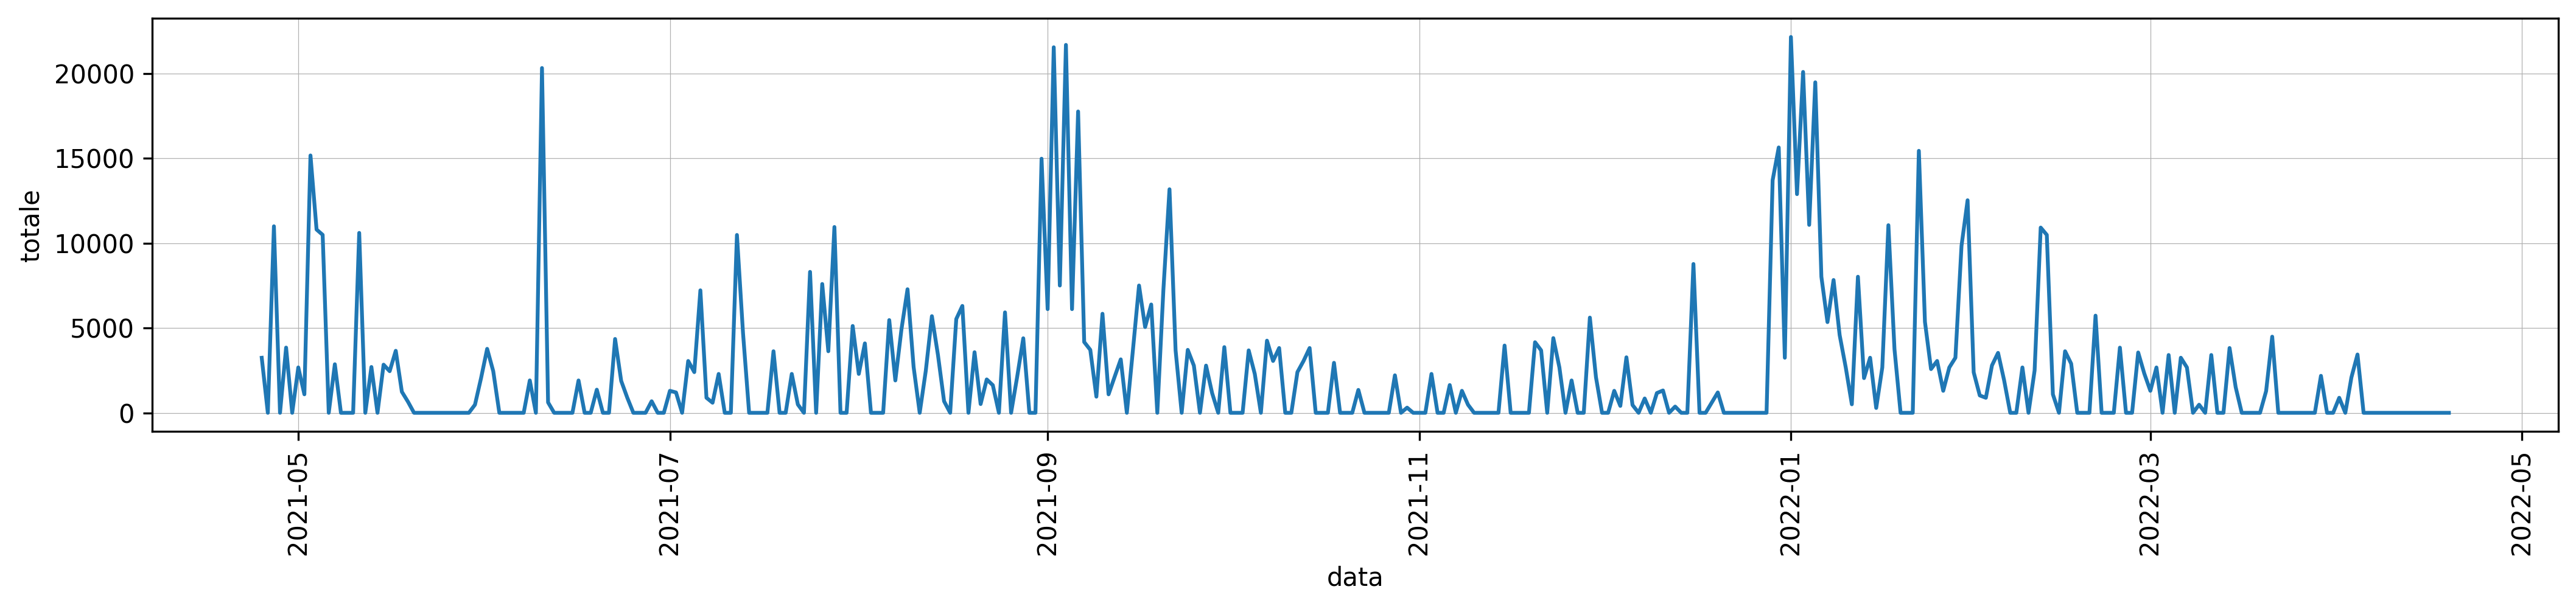

In [ ]:
#IN ALTERNATIVA (ts[ts["settore"]==categorie]['totale']) <--NON funziona l'iterazione;settare un settore alla volta 
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ts.tail(360), x='data', y='totale')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

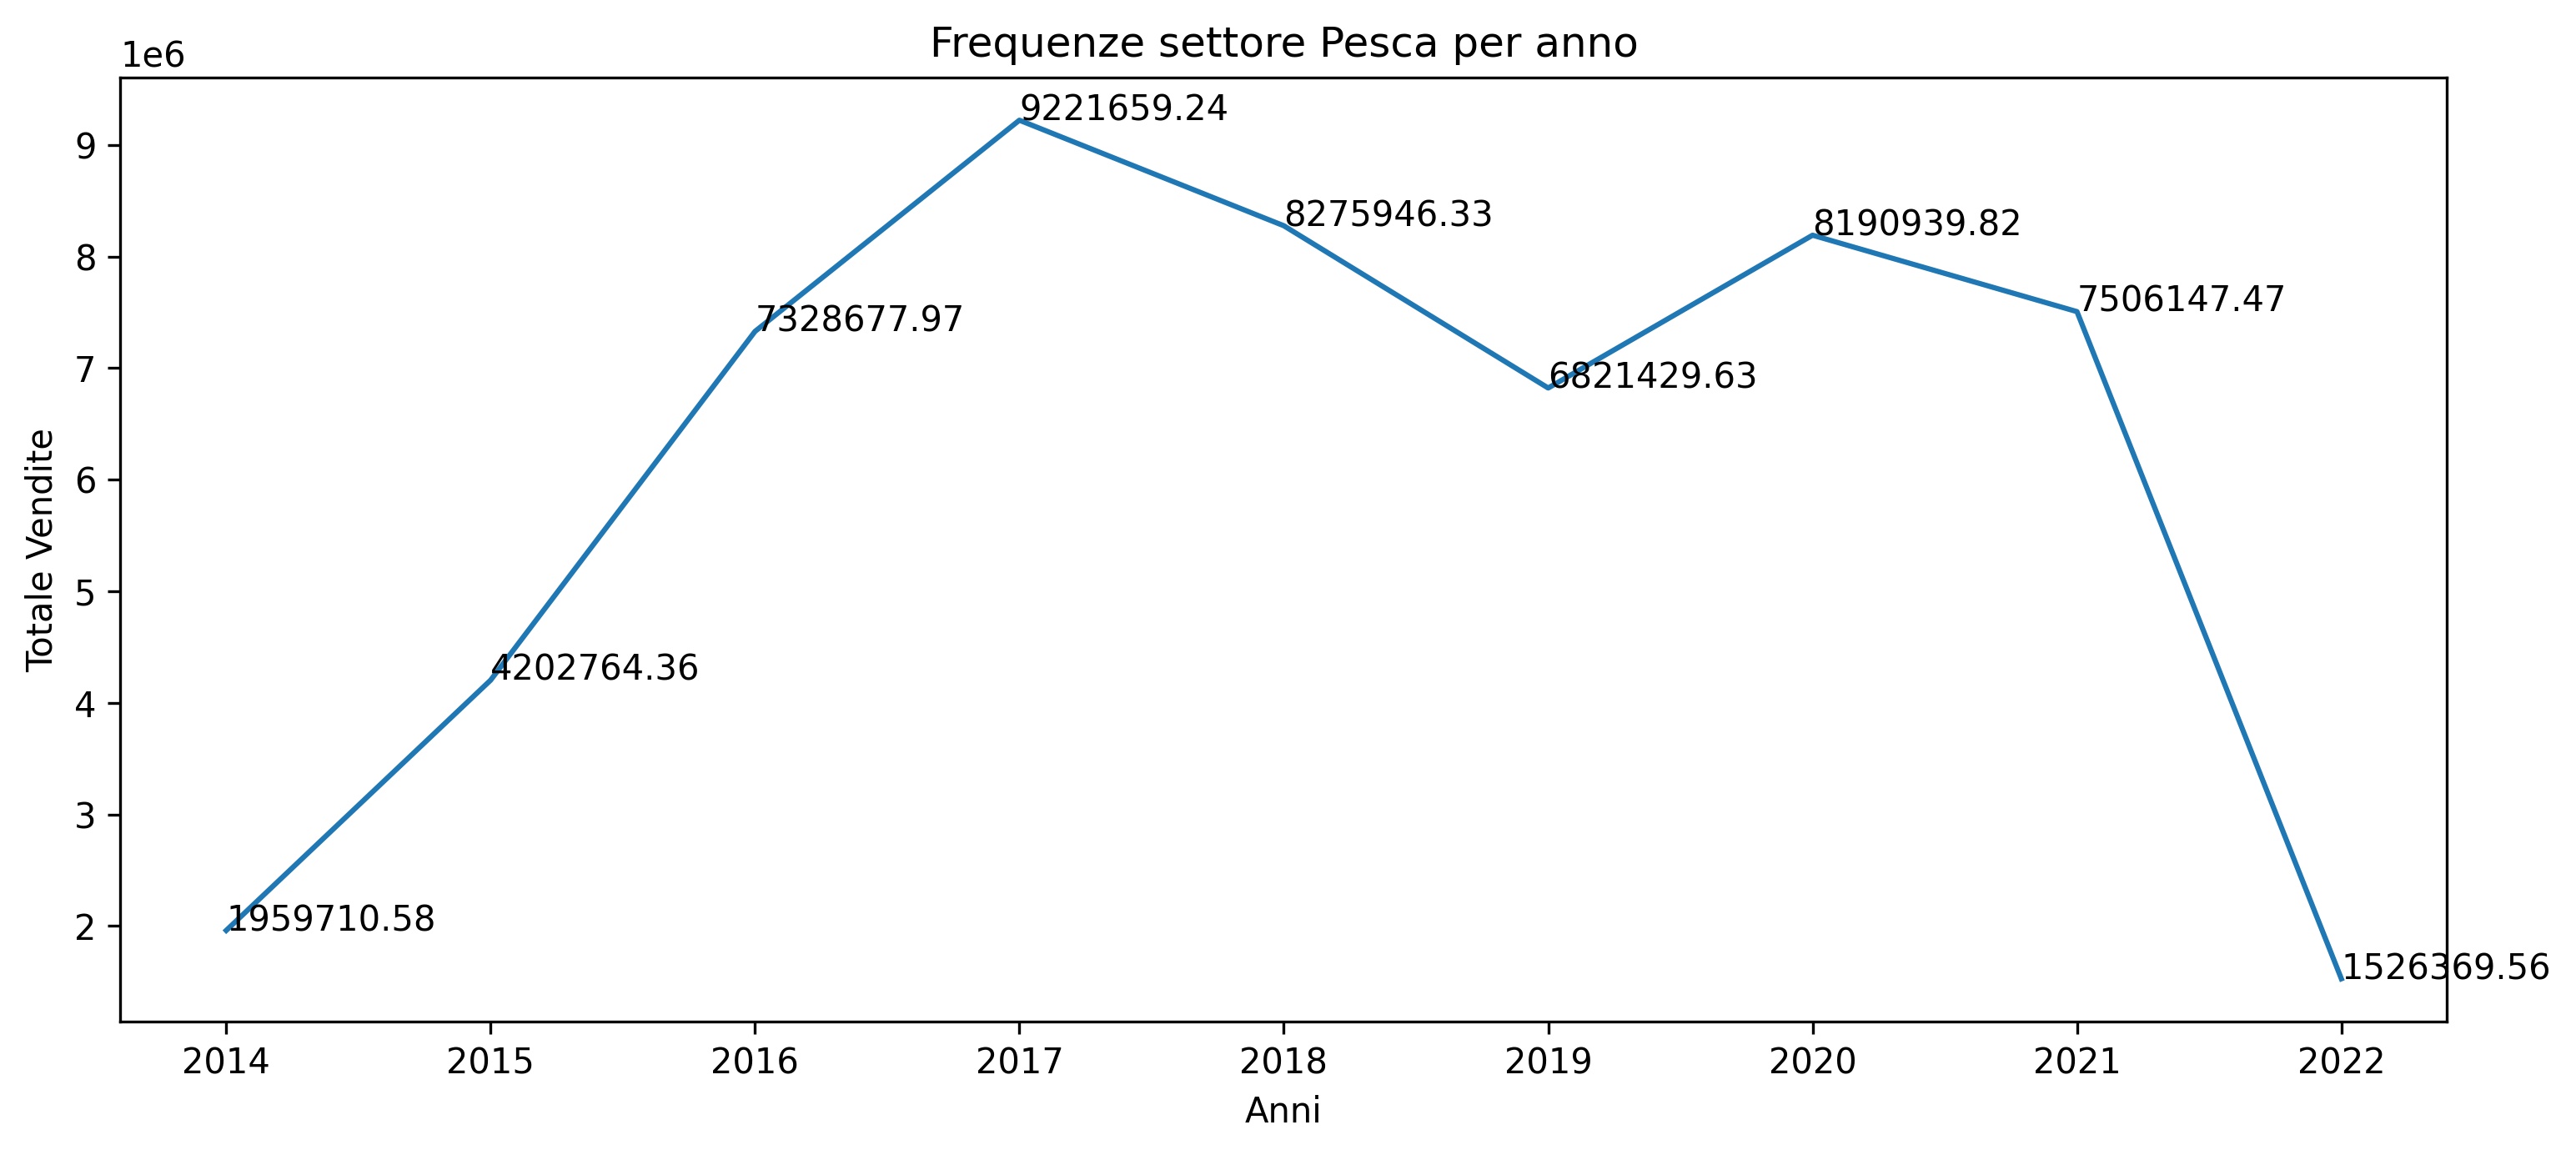

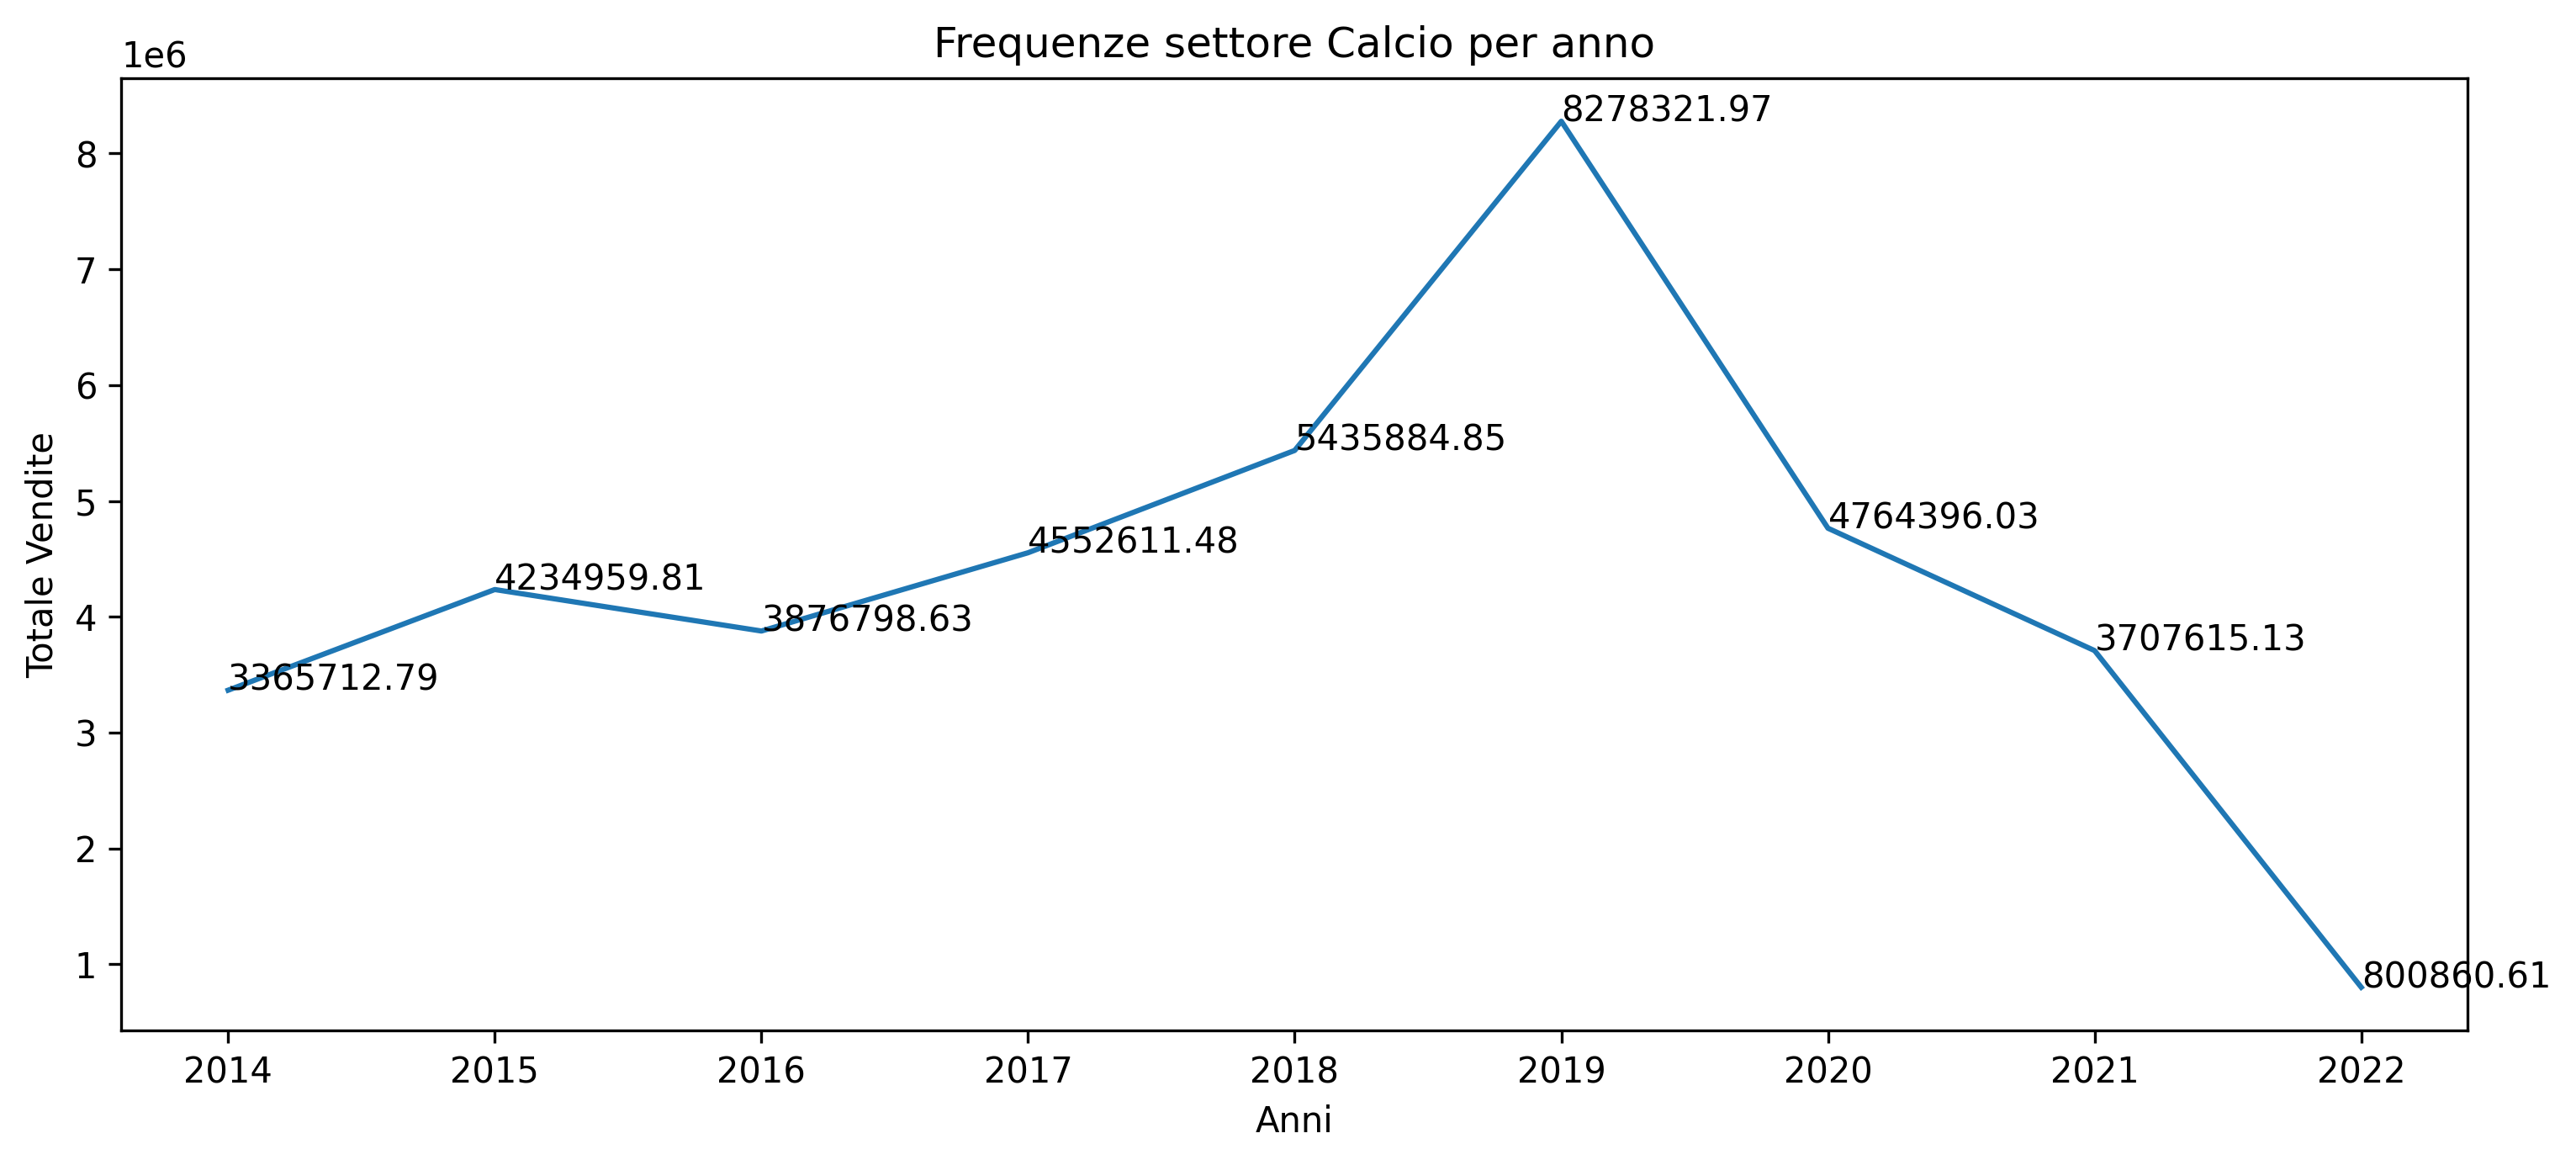

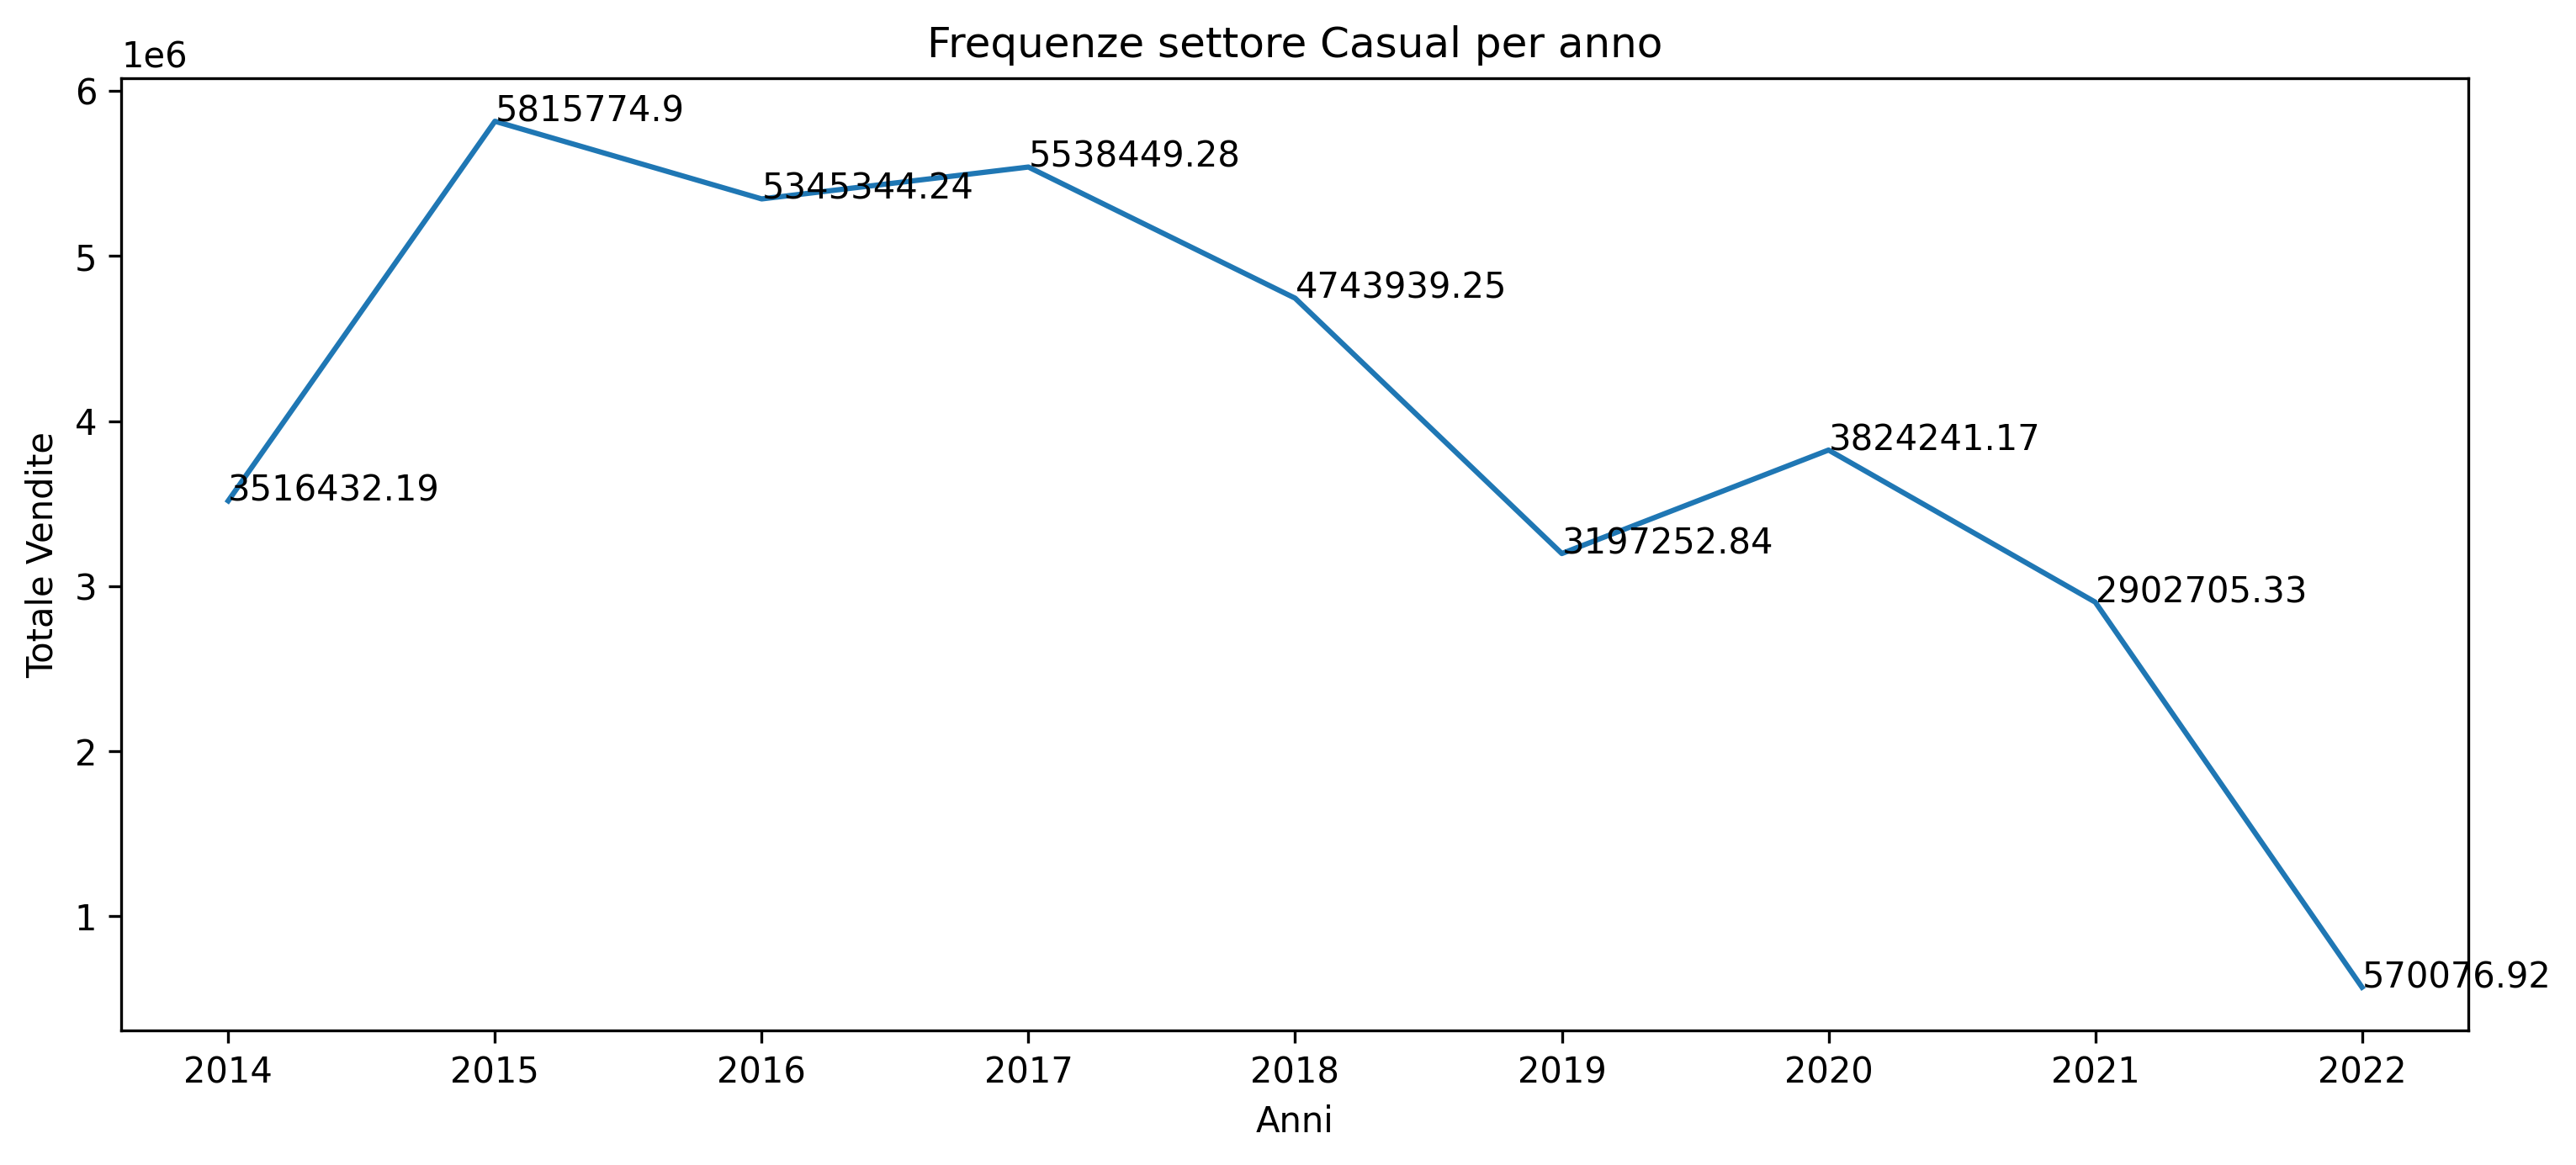

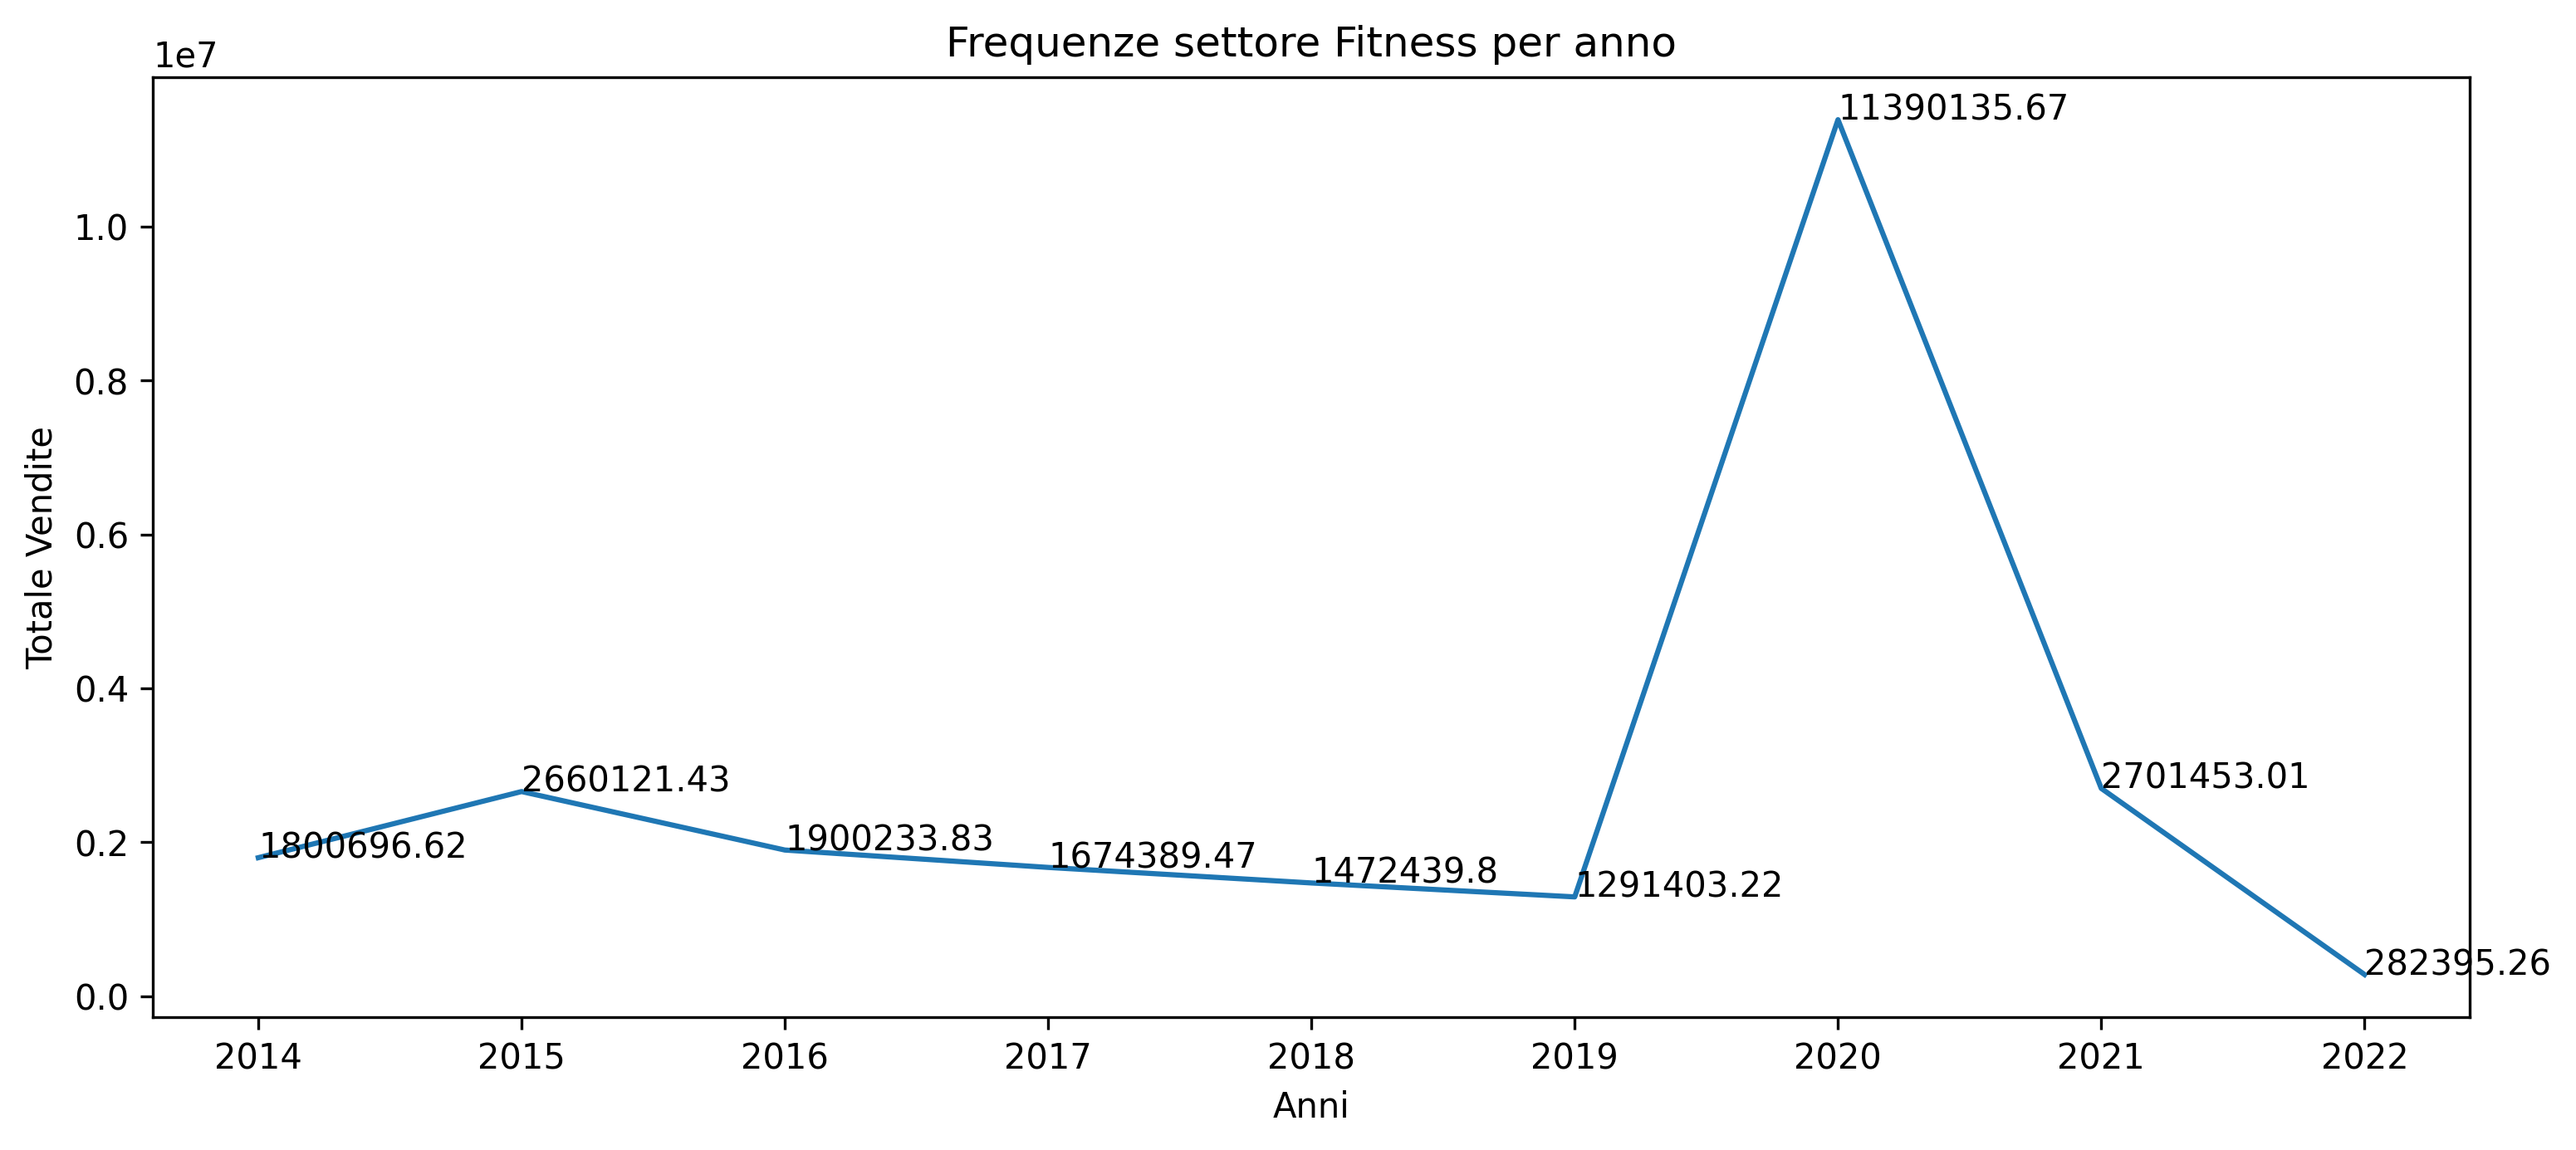

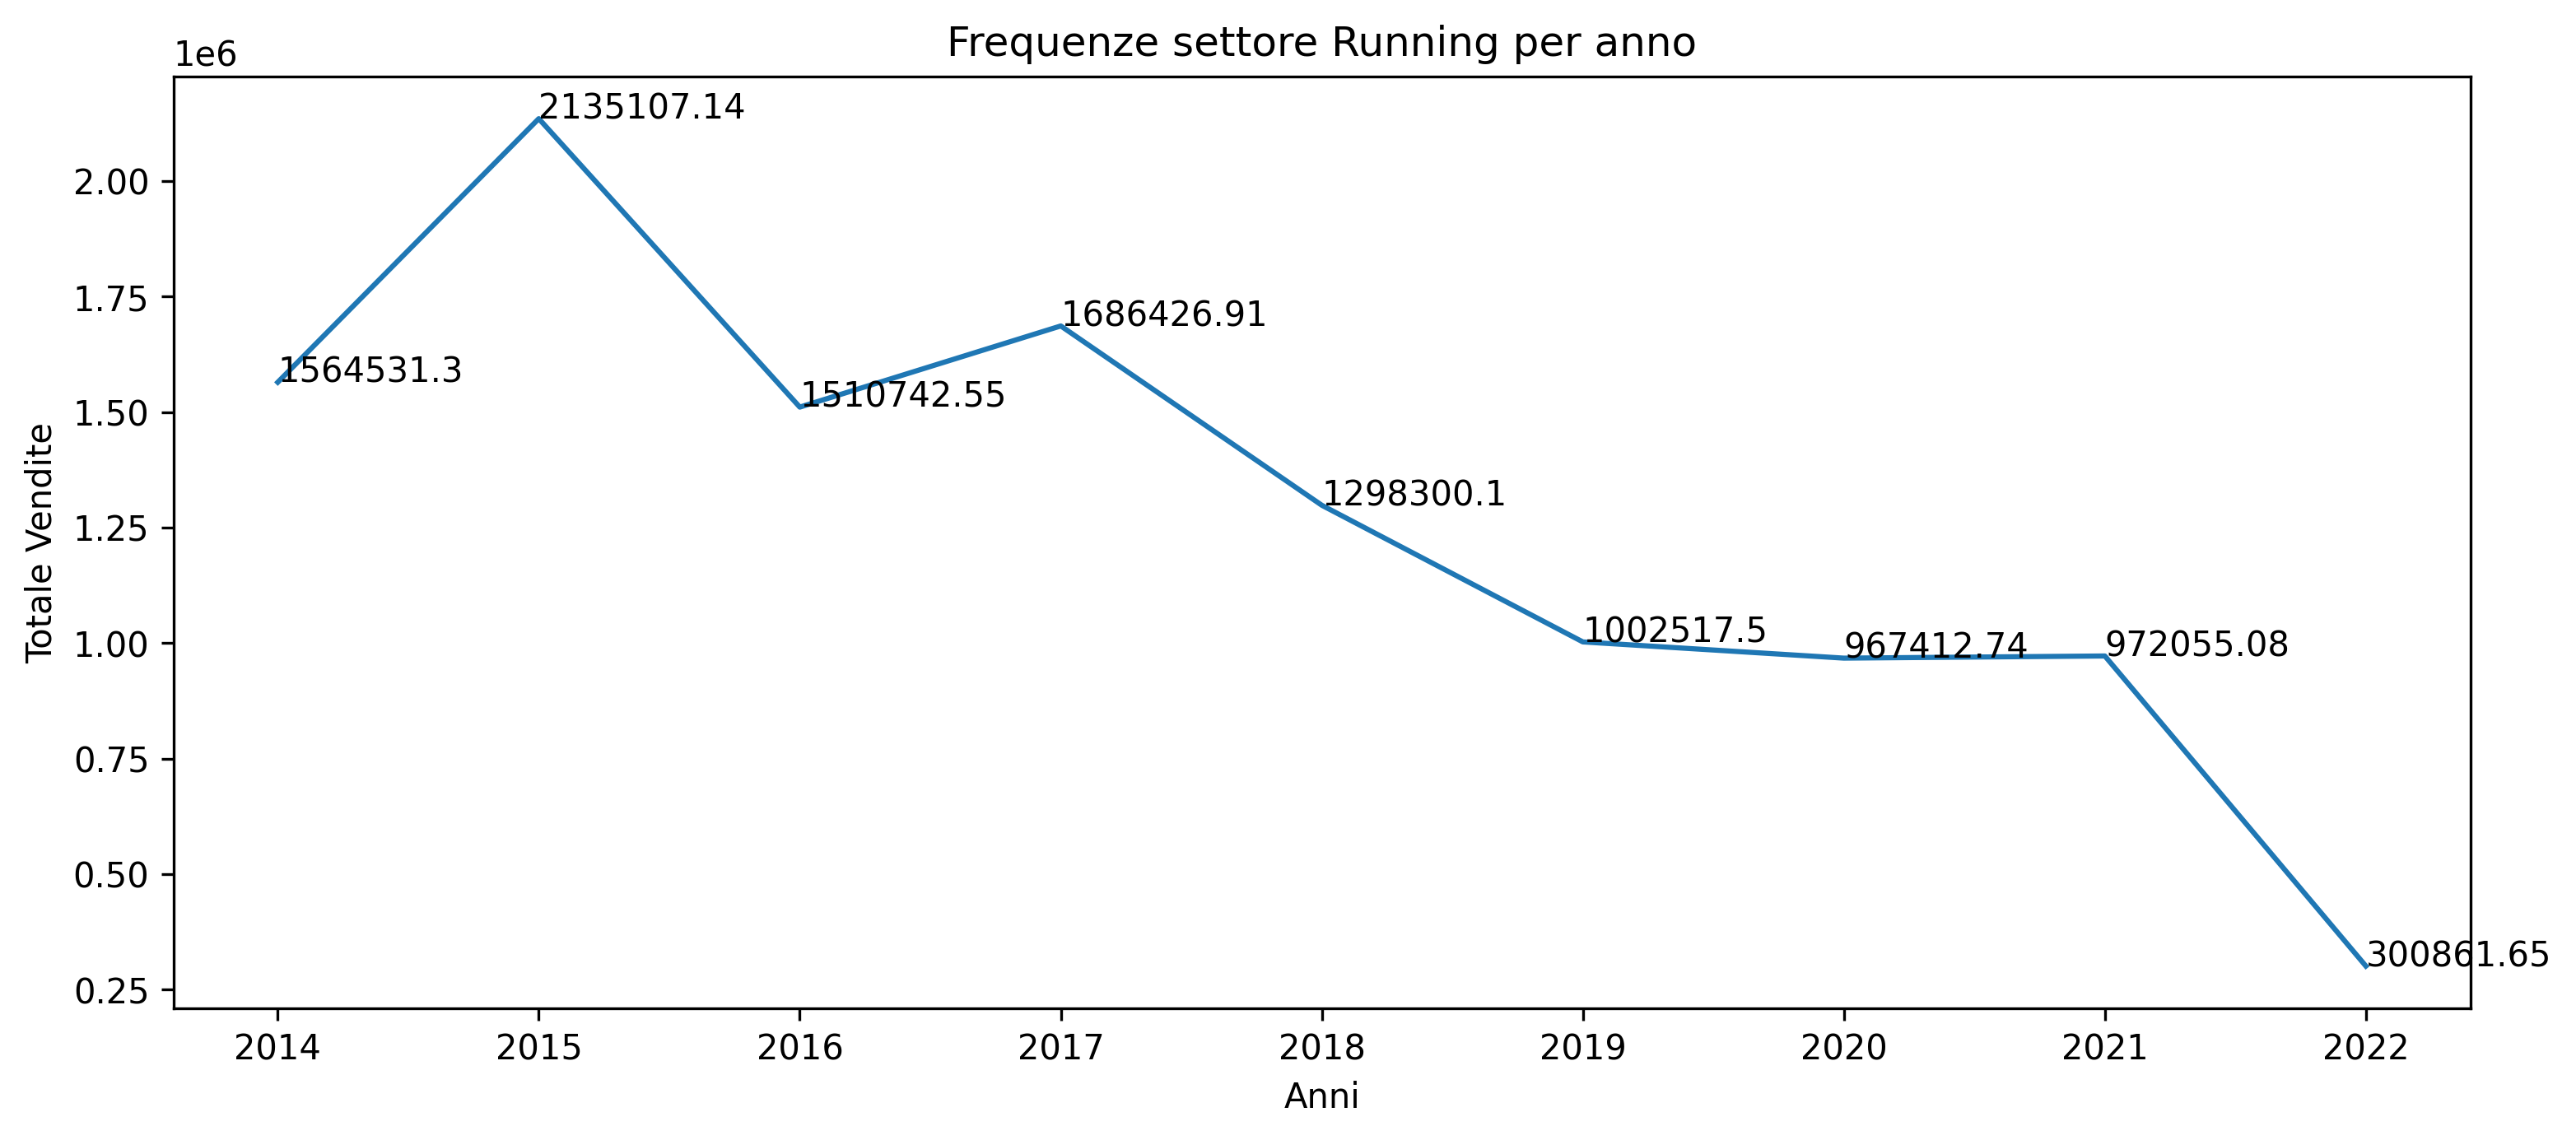

In [ ]:
for categorie in ts.settore.unique():
    
    #Andamento annuale delle vendite per ogni settore sportivo
    dv = ts[ts['settore'] == categorie].groupby(['Anno'], as_index = False).sum()[['Anno', 'totale']] #Visualizziamo solo queste in un dataframe nuovo

    #Corpo della visualizzazione
    plt.figure(figsize=(12,5))
    x = dv['Anno'].to_list()
    y = dv['totale'].to_list()

    # Parte Estetica 
    plt.xticks(x)
    # plt.yticks(range(0,366,30))
    plt.xlabel('Anni')
    plt.ylabel('Totale Vendite')
    plt.plot(x, y)
    plt.title('Frequenze settore {} per anno'.format(categorie))
    
    # Mostra valori esatti del totale vendite per ogni osservazione (per ogni anno)
    for i,j in zip(x,y):
        plt.annotate(str(j),xy=(i,j))

Notiamo degli andamenti poco costanti tra i vari anni

#**Osservazioni sulle vendite di prodotti Running**
***Per osservare uno dei due sport inserire uno dei due nella variabile generale: **


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


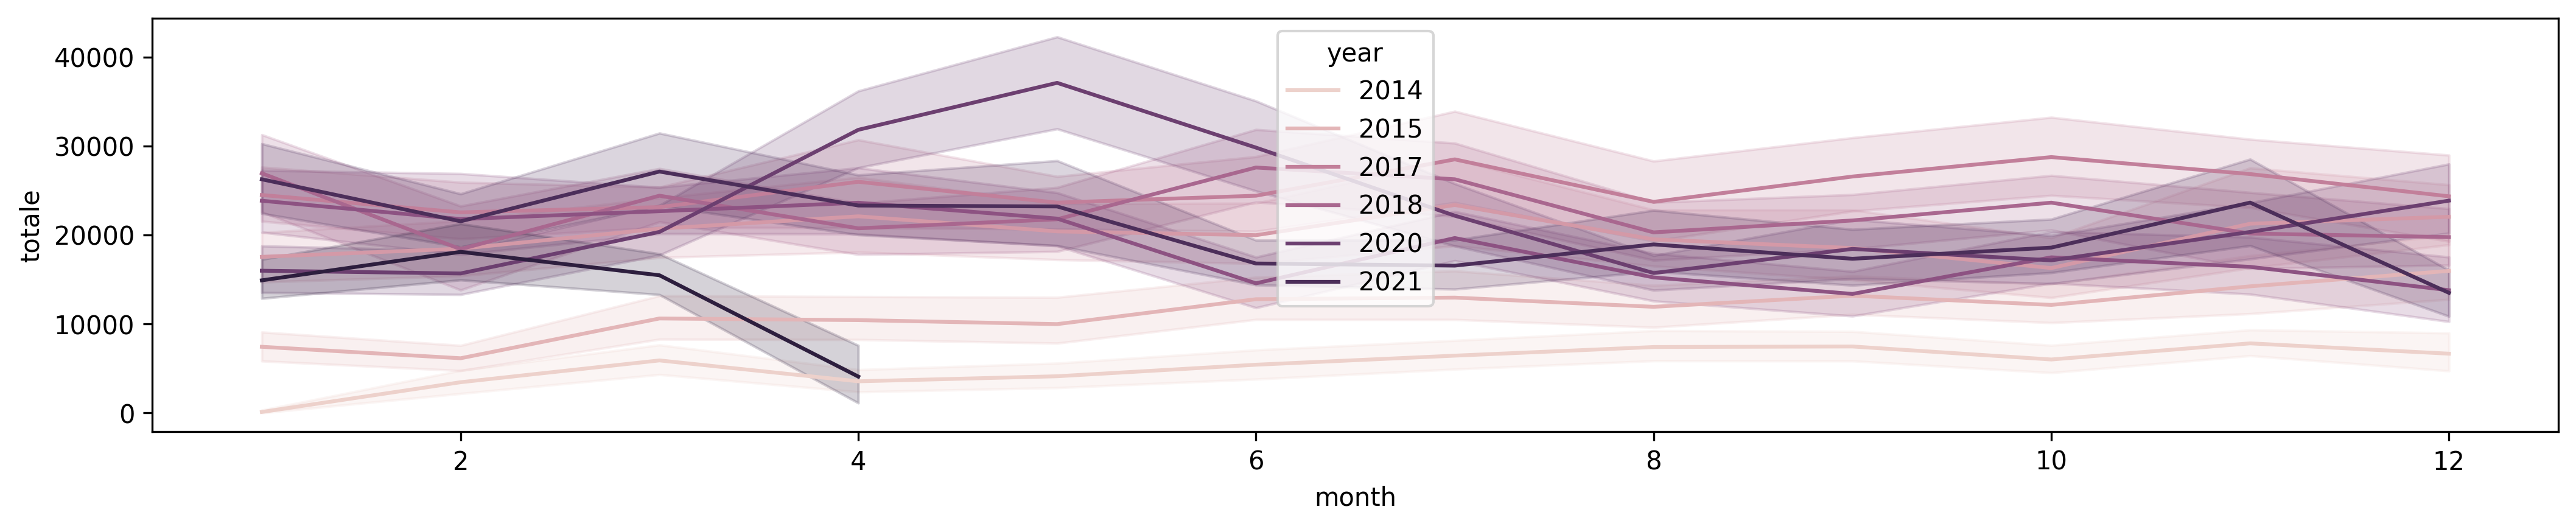

In [ ]:
#Se non si riesce a farlo iterato allora provo ad approfondire Running
sport = "Pesca" 

ts_sport = ts[ts["settore"]== sport]
ts_sport['month'] = ts_sport['data'].dt.month
ts_sport['year'] = ts_sport['data'].dt.year
sns.lineplot(x= ts_sport['month'], y= ts_sport['totale'],hue=ts_sport['year'])

#for categorie in ts.settore.unique():
#  ts_iterazione+str("categorie") = ts[ts["settore"] == catgorie ]
  #ts_iterazione+str("categorie")['month'] = ts_iterazione['data'].dt.month
  #ts_iterazione+str("categorie")['year'] = ts_iterazione['data'].dt.year
  #sns.lineplot(ts_iterazione['month'], y=ts_iterazione['totale'], hue=ts_iterazione['year'])

#Guardiamo alle vendite giornaliere

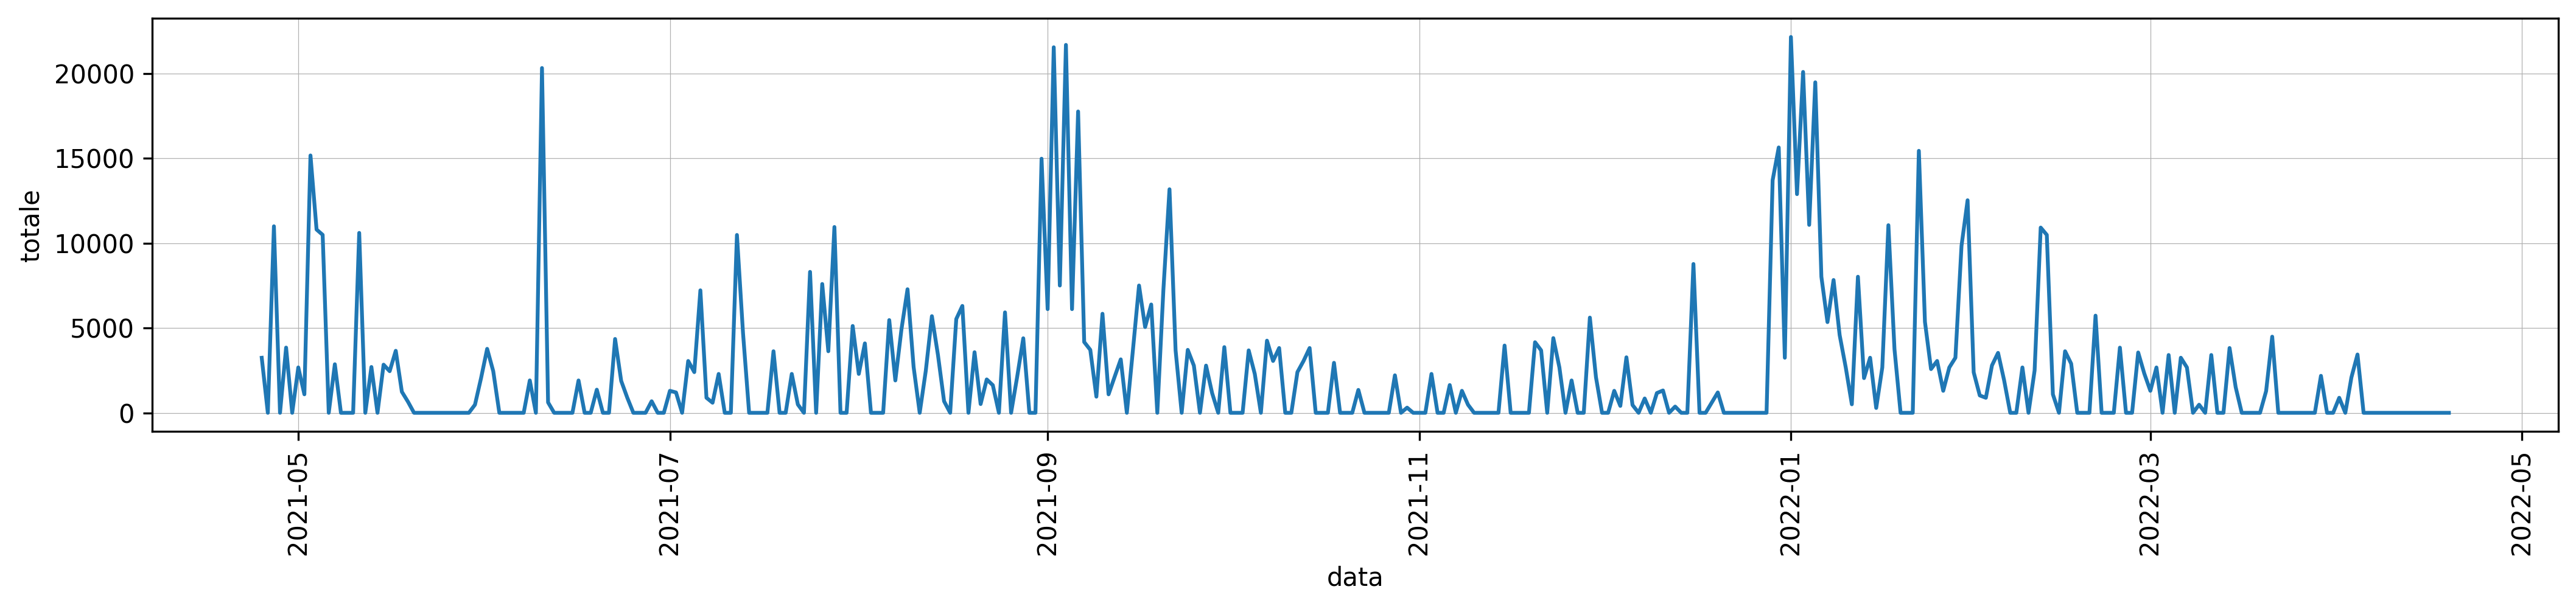

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ts[ts["settore"]=="Running"].tail(360), x='data', y='totale',)
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
ts_sport["totale_giorno_prec"] = ts_sport["totale"].shift(+1)
ts_sport= ts_sport.dropna()
ts_sport.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


data settore    totale  Anno      Mese  Giorno  month  year  \
1  2014-01-02   Pesca      0.00  2014   Gennaio       2      1  2014   
2  2014-01-03   Pesca      0.00  2014   Gennaio       3      1  2014   
3  2014-01-04   Pesca      0.00  2014   Gennaio       4      1  2014   
4  2014-01-05   Pesca      0.00  2014   Gennaio       5      1  2014   
5  2014-01-06   Pesca      0.00  2014   Gennaio       6      1  2014   
6  2014-01-07   Pesca      0.00  2014   Gennaio       7      1  2014   
7  2014-01-08   Pesca      0.00  2014   Gennaio       8      1  2014   
8  2014-01-09   Pesca      0.00  2014   Gennaio       9      1  2014   
9  2014-01-10   Pesca      0.00  2014   Gennaio      10      1  2014   
10 2014-01-11   Pesca      0.00  2014   Gennaio      11      1  2014   
11 2014-01-12   Pesca      0.00  2014   Gennaio      12      1  2014   
12 2014-01-13   Pesca      0.00  2014   Gennaio      13      1  2014   
13 2014-01-14   Pesca      0.00  2014   Gennaio      14      1  2014   
14 2014-01-15   Pesca      0.00  2014   Gennaio      15      1  2014   
15 2014-01-16   Pesca      0.00  2014   Gennaio      16      1  2014   
16 2014-01-17   Pesca      0.00  2014   Gennaio      17      1  2014   
17 2014-01-18   Pesca      0.00  2014   Gennaio      18      1  2014   
18 2014-01-19   Pesca      0.00  2014   Gennaio      19      1  2014   
19 2014-01-20   Pesca      0.00  2014   Gennaio      20      1  2014   
20 2014-01-21   Pesca      0.00  2014   Gennaio      21      1  2014   
21 2014-01-22   Pesca      0.00  2014   Gennaio      22      1  2014   
22 2014-01-23   Pesca   3188.02  2014   Gennaio      23      1  2014   
23 2014-01-24   Pesca      0.00  2014   Gennaio      24      1  2014   
24 2014-01-25   Pesca      0.00  2014   Gennaio      25      1  2014   
25 2014-01-26   Pesca      0.00  2014   Gennaio      26      1  2014   
26 2014-01-27   Pesca      0.00  2014   Gennaio      27      1  2014   
27 2014-01-28   Pesca      0.00  2014   Gennaio      28      1  2014   
28 2014-01-29   Pesca      0.00  2014   Gennaio      29      1  2014   
29 2014-01-30   Pesca      0.00  2014   Gennaio      30      1  2014   
30 2014-01-31   Pesca      0.00  2014   Gennaio      31      1  2014   
31 2014-02-01   Pesca      0.00  2014  Febbraio       1      2  2014   
32 2014-02-02   Pesca    637.49  2014  Febbraio       2      2  2014   
33 2014-02-03   Pesca      0.00  2014  Febbraio       3      2  2014   
34 2014-02-04   Pesca   7268.69  2014  Febbraio       4      2  2014   
35 2014-02-05   Pesca   1888.47  2014  Febbraio       5      2  2014   
36 2014-02-06   Pesca  15340.25  2014  Febbraio       6      2  2014   
37 2014-02-07   Pesca   9386.94  2014  Febbraio       7      2  2014   
38 2014-02-08   Pesca   1655.41  2014  Febbraio       8      2  2014   
39 2014-02-09   Pesca   8432.61  2014  Febbraio       9      2  2014   
40 2014-02-10   Pesca   5835.56  2014  Febbraio      10      2  2014   
41 2014-02-11   Pesca   5786.03  2014  Febbraio      11      2  2014   
42 2014-02-12   Pesca   5292.90  2014  Febbraio      12      2  2014   
43 2014-02-13   Pesca   1295.18  2014  Febbraio      13      2  2014   
44 2014-02-14   Pesca    628.76  2014  Febbraio      14      2  2014   
45 2014-02-15   Pesca   2190.84  2014  Febbraio      15      2  2014   
46 2014-02-16   Pesca    754.02  2014  Febbraio      16      2  2014   
47 2014-02-17   Pesca    680.07  2014  Febbraio      17      2  2014   
48 2014-02-18   Pesca      0.00  2014  Febbraio      18      2  2014   
49 2014-02-19   Pesca      0.00  2014  Febbraio      19      2  2014   
50 2014-02-20   Pesca   3076.95  2014  Febbraio      20      2  2014   

    totale_giorno_prec  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  
5                 0.00  
6                 0.00  
7                 0.00  
8                 0.00  
9                 0.00  
10                0.00  
11                0.00  
12                0.00  
13         

In [ ]:
type(ts_sport)

pandas.core.frame.DataFrame

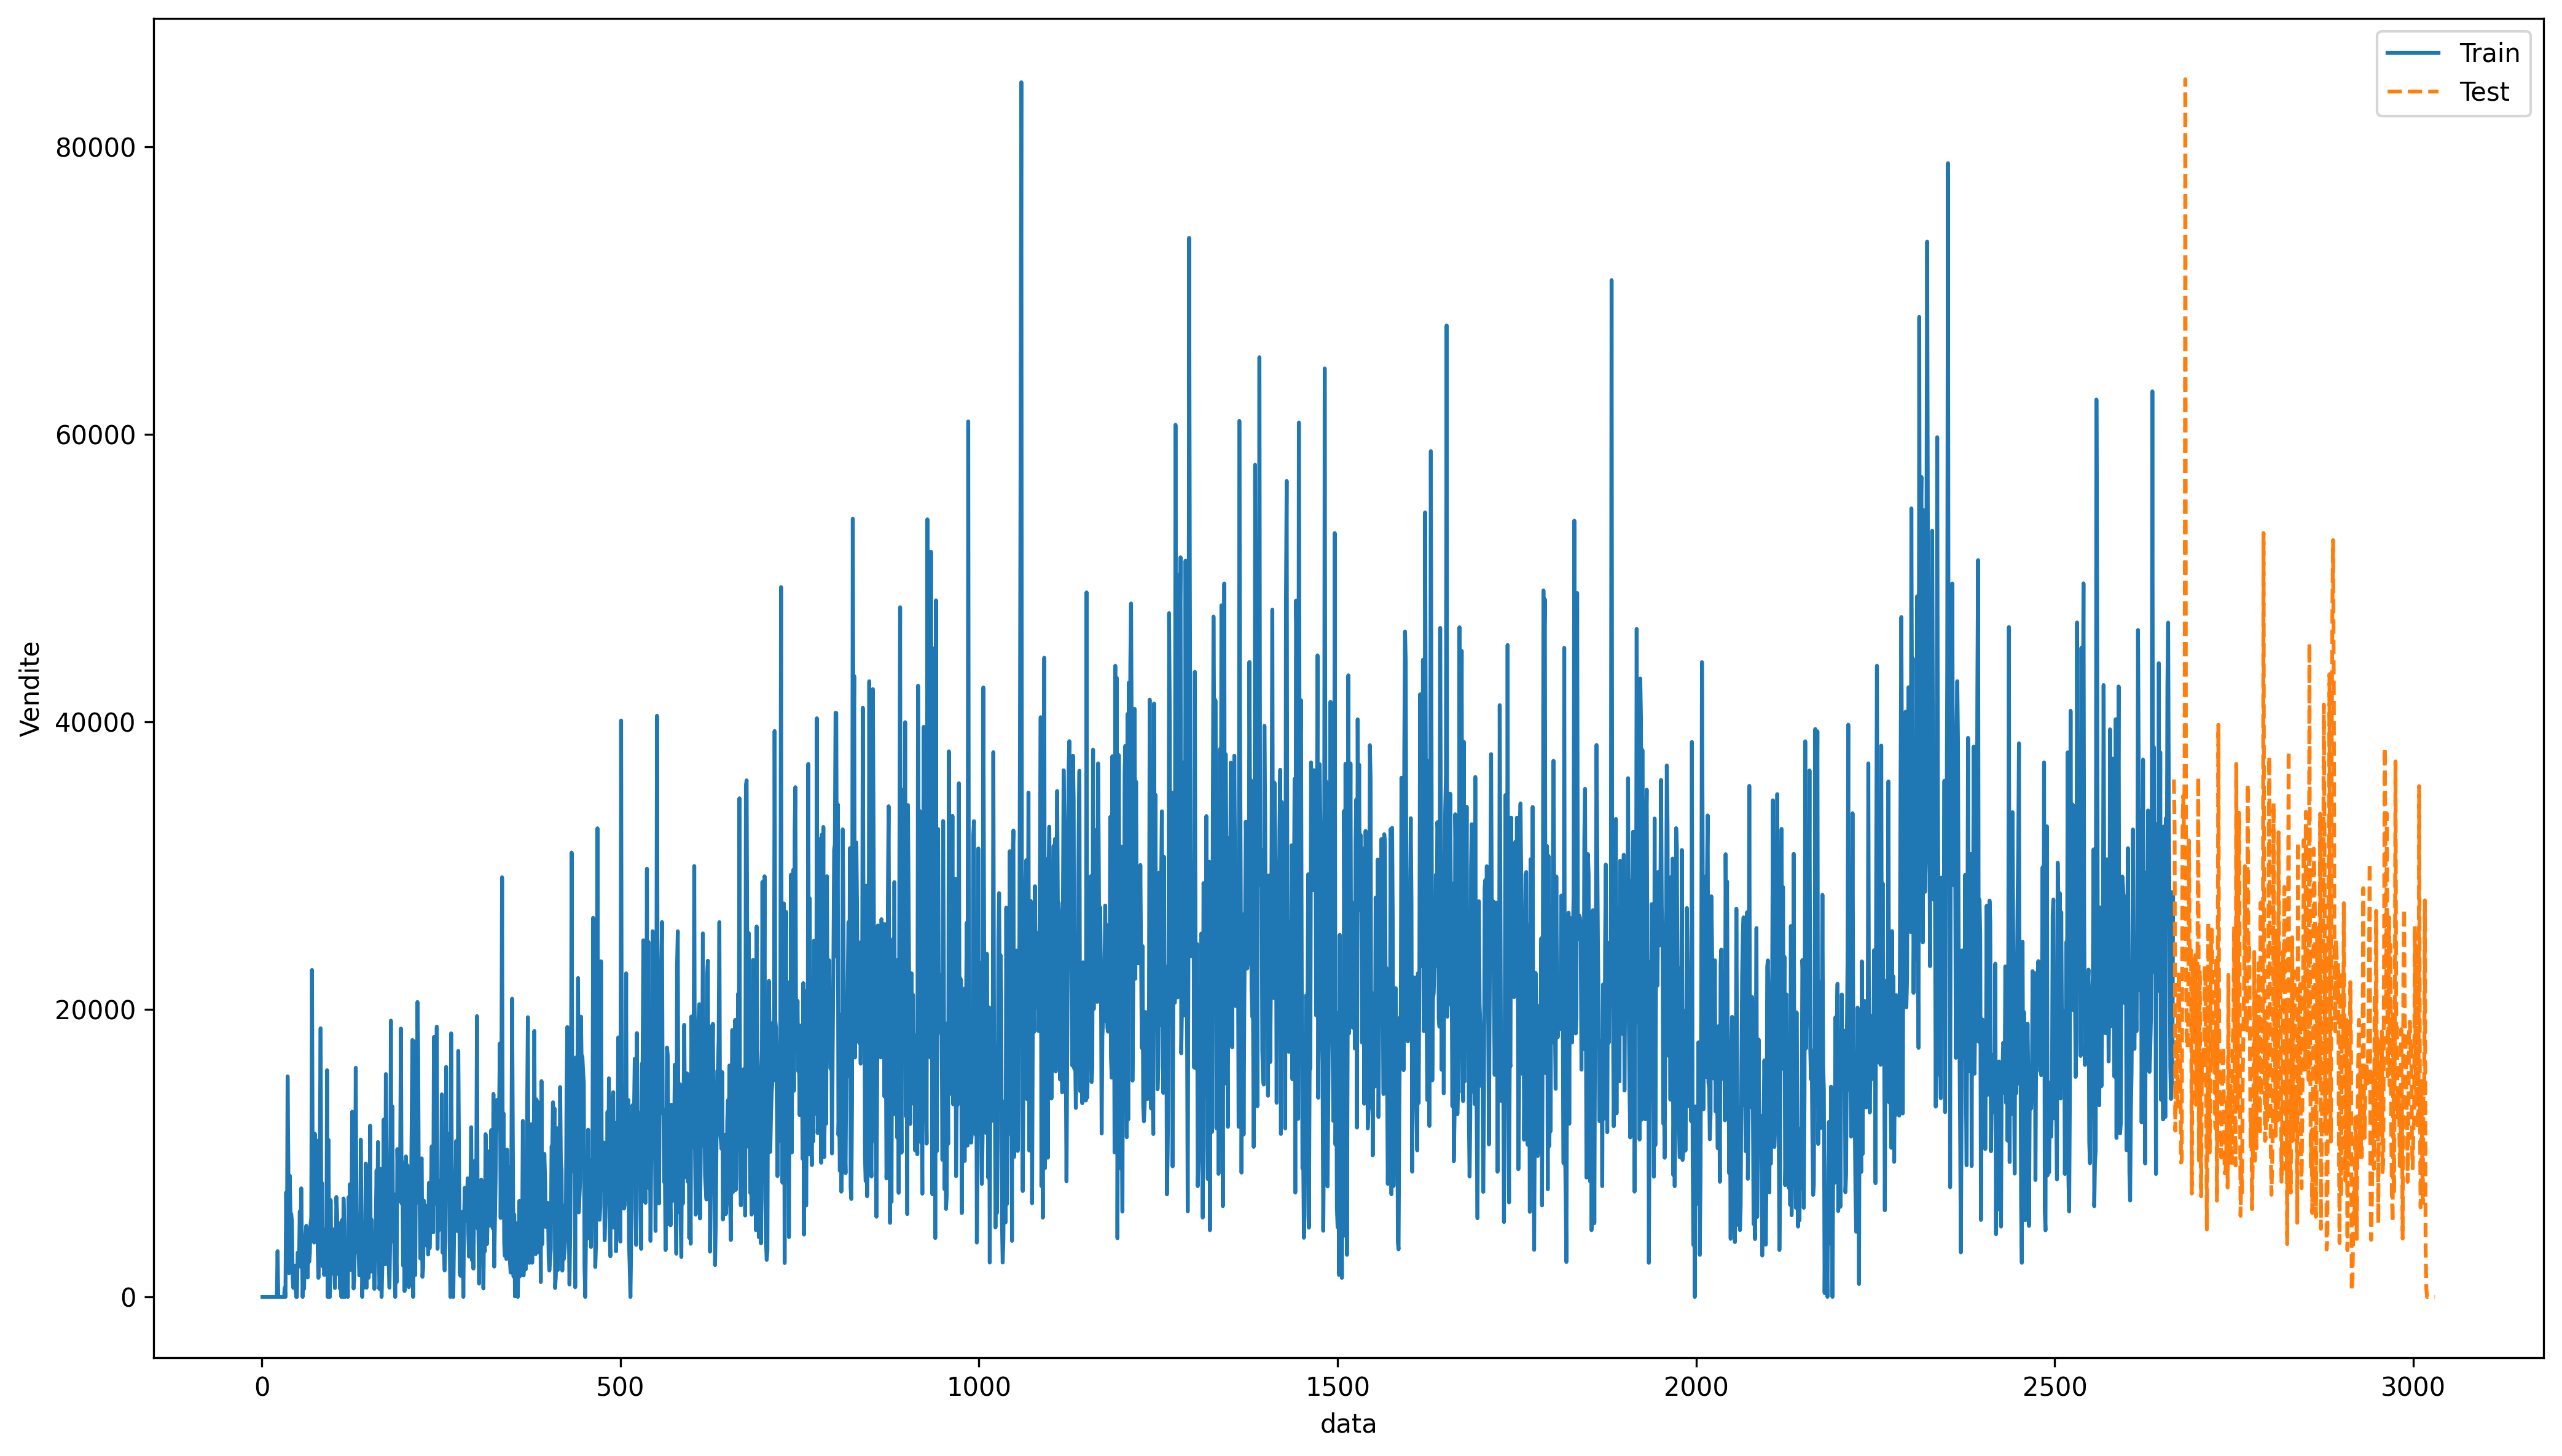

In [ ]:
x_sport = ts_sport[['totale_giorno_prec']]
x_sport_to_train = x_sport.iloc[:(len(x_sport)-365)]
x_sport_to_test = x_sport.iloc[(len(x_sport)-365):]

y_sport = ts_sport[['totale']]
y_sport_to_train = y_sport.iloc[:(len(y_sport)-365)] #Tutti meno gli ultimi 365gg per il training
y_sport_to_test = y_sport.iloc[(len(y_sport)-365):] #Dagli ultimi 365gg fino alla fine



#Visualizziamo la divisione tra train e test
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(y_sport_to_train, ls='-', label='Train')
ax.plot(y_sport_to_test, ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
## transform a time series dataset into a supervised learning dataset
#def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#	n_vars = 1 if type(data) is list else data.shape[1]
#	df = DataFrame(data)
#	cols = list()
#	# input sequence (t-n, ... t-1)
#	for i in range(n_in, 0, -1):
#		cols.append(df.shift(i))
#	# forecast sequence (t, t+1, ... t+n)
#	for i in range(0, n_out):
#		cols.append(df.shift(-i))
#	# put it all together
#	agg = concat(cols, axis=1)
#	# drop rows with NaN values
#	if dropnan:
#		agg.dropna(inplace=True)
#	return agg.values
# 
## split a univariate dataset into train/test sets
#def train_test_split(data, n_test):
#	return data[:-n_test, :], data[-n_test:, :]
# 
## fit an xgboost model and make a one step prediction
#def xgboost_forecast(train, testX):
#	# transform list into array
#	train = asarray(train)
#	# split into input and output columns
#	trainX, trainy = train[:, :-1], train[:, -1]
#	# fit model
#	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
#	model.fit(trainX, trainy)
#	# make a one-step prediction
#	yhat = model.predict(asarray([testX]))
#	return yhat[0]
# 
## walk-forward validation for univariate data
#def walk_forward_validation(data, n_test):
#	predictions = list()
#	# split dataset
#	train, test = train_test_split(data, n_test)
#	# seed history with training dataset
#	history = [x for x in train]
#	# step over each time-step in the test set
#	for i in range(len(test)):
#		# split test row into input and output columns
#		testX, testy = test[i, :-1], test[i, -1]
#		# fit model on history and make a prediction
#		yhat = xgboost_forecast(history, testX)
#		# store forecast in list of predictions
#		predictions.append(yhat)
#		# add actual observation to history for the next loop
#		history.append(test[i])
#		# summarize progress
#		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
#	# estimate prediction error
#	error = mean_absolute_error(test[:, -1], predictions)
#	return error, test[:, -1], predictions
# 
## load the dataset
#series = pd.read_csv('https://github.com/Alessandro-Fasani/DsLab/raw/main/serie-storiche-ecommerce-pulito-no-buchi-temporali.csv', header=0, index_col=0)
#values = series.values
## transform the time series data into supervised learning
#data = series_to_supervised(values, n_in=6)
## evaluate
#mae, y, yhat = walk_forward_validation(data, 12)
#print('MAE: %.3f' % mae)
## plot expected vs preducted
#pyplot.plot(y, label='Expected')
#pyplot.plot(yhat, label='Predicted')
#pyplot.legend()
#pyplot.show()

In [ ]:
#y_pred_baseline = y_gg_to_train[-365:].values #non ne ho compreso bene il funzionamento

In [ ]:
# Fit the model

estimator = XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.01)
estimator.fit(x_sport_to_train, y_sport_to_train,
              eval_set=[(x_sport_to_train, y_sport_to_train), (x_sport_to_test, y_sport_to_test)],
              eval_metric='mae')

[0]	validation_0-mae:18111.1	validation_1-mae:17040.5
[1]	validation_0-mae:17932.9	validation_1-mae:16860.7
[2]	validation_0-mae:17756.5	validation_1-mae:16683.4
[3]	validation_0-mae:17581.9	validation_1-mae:16508.6
[4]	validation_0-mae:17409.4	validation_1-mae:16335.1
[5]	validation_0-mae:17238.8	validation_1-mae:16163.8
[6]	validation_0-mae:17070.3	validation_1-mae:15994.2
[7]	validation_0-mae:16903.7	validation_1-mae:15825.9
[8]	validation_0-mae:16739.1	validation_1-mae:15659.7
[9]	validation_0-mae:16576.6	validation_1-mae:15495.1
[10]	validation_0-mae:16416.2	validation_1-mae:15332.5
[11]	validation_0-mae:16257.8	validation_1-mae:15171
[12]	validation_0-mae:16101.3	validation_1-mae:15011.3
[13]	validation_0-mae:15946.8	validation_1-mae:14853.5
[14]	validation_0-mae:15794.3	validation_1-mae:14696.8
[15]	validation_0-mae:15643.9	validation_1-mae:14543
[16]	validation_0-mae:15495.3	validation_1-mae:14391.5
[17]	validation_0-mae:15348.6	validation_1-mae:14241.7
[18]	validation_0-mae:15

XGBRegressor(learning_rate=0.01, n_estimators=500, objective='reg:squarederror')

In [ ]:
predictions = estimator.predict(x_sport_to_test)

In [ ]:
ts_sport = ts_sport.reset_index().drop('index', axis=1)
ts_sport['predictions'] = pd.Series(predictions)

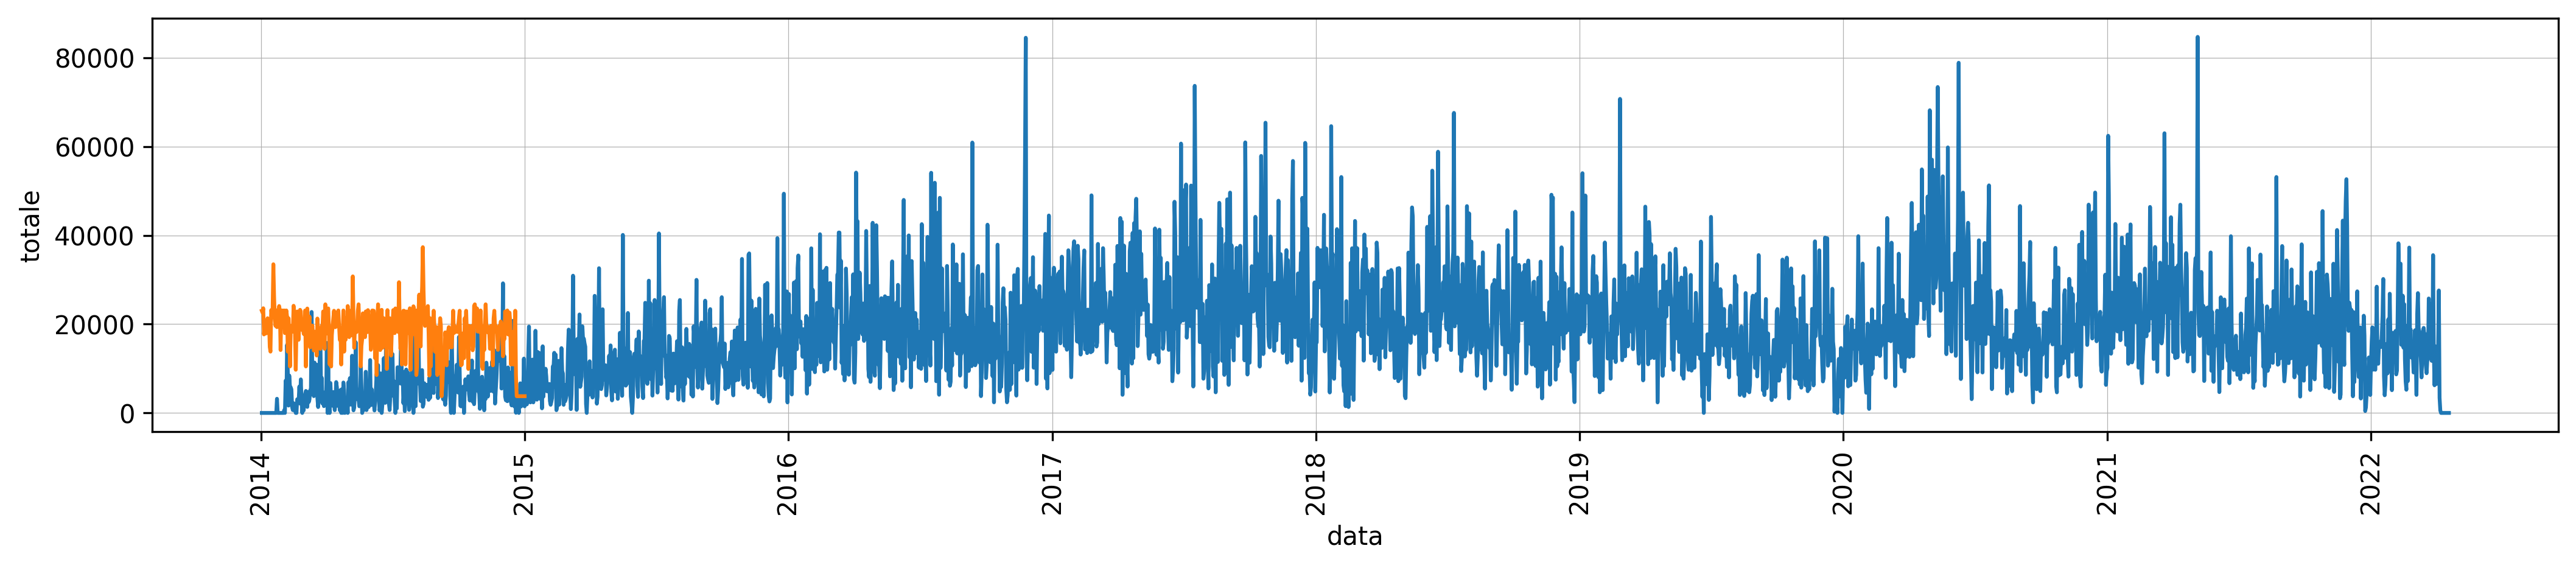

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ts_sport, x= "data", y='totale')
sns.lineplot(data=ts_sport, x='data', y='predictions', palette= "red")
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

#fig, ax = plt.subplots(figsize=(14, 8))
#ax.plot(ts_sport["totale"].tail(720), ls='-', label='Originale')
#ax.plot(ts_sport["predictions"], ls='--', label='Predizione')
#ax.set_xlabel('data')
#ax.set_ylabel('Vendite')
#
#ax.legend(loc='best')
#plt.tight_layout()
#plt.show()

In [ ]:
ts_sport.tail()  #PROBLEMA!!!!!!!!! NON CI SONO LE PREDICTION SUL TAIL()

data settore  totale  Anno    Mese  Giorno  month  year  \
3025 2022-04-15   Pesca     0.0  2022  Aprile      15      4  2022   
3026 2022-04-16   Pesca     0.0  2022  Aprile      16      4  2022   
3027 2022-04-17   Pesca     0.0  2022  Aprile      17      4  2022   
3028 2022-04-18   Pesca     0.0  2022  Aprile      18      4  2022   
3029 2022-04-19   Pesca     0.0  2022  Aprile      19      4  2022   

      totale_giorno_prec  predictions  
3025                 0.0          NaN  
3026                 0.0          NaN  
3027                 0.0          NaN  
3028                 0.0          NaN  
3029                 0.0          NaN

In [ ]:
#ts_sport_evaluation = ts_sport[ts_sport[]]
#def mean_absolute_percentage_error(y_true, y_pred): 
#
#    y_true, y_pred = np.array(y_true), np.array(y_pred)
#
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

SyntaxError: ignored

#Guardiamo alle vendite settimanali
(Riguarda il video dell'indiano perchè ci serve costruire la somma mobile con le query!)

#Guardiamo alle vendite mensili

#Guardiamo alle vendite trimestrali

In [ ]:
ts_calcio_trim = pd.read_csv("https://github.com/Alessandro-Fasani/DsLab/raw/main/calcio_trimestrale.csv")
ts_calcio_trim.sample(2)

In [ ]:
ts_calcio_trim['year'] = pd.to_datetime(ts_calcio_trim['year'])
ts_calcio_trim.dtypes

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ts_calcio_trim, x='year', y='revenue',)
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
ts_calcio_trim["totale_trimestre_prec"] = ts_calcio_trim["revenue"].shift(+1)
ts_calcio_trim= ts_calcio_trim.dropna()
ts_calcio_trim

In [ ]:
x_calcio = ts_calcio_trim[['totale_trimestre_prec']]
x_calcio_to_train = x_calcio.iloc[:(len(x_calcio)-8)]
x_calcio_to_test = x_calcio.iloc[(len(x_calcio)-8):]

y_calcio = ts_calcio_trim[['revenue']]
y_calcio_to_train = y_calcio.iloc[:(len(y_calcio)-8)]
y_calcio_to_test = y_calcio.iloc[(len(y_calcio)-8):]

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(y_calcio_to_train, ls='-', label='Train')
ax.plot(y_calcio_to_test, ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
estimator_calcio_trim = XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.01)
estimator_calcio_trim.fit(x_calcio_to_train, y_calcio_to_train,
              eval_set=[(x_calcio_to_train, y_calcio_to_train), (x_calcio_to_test, y_calcio_to_test)],
              eval_metric='mae')

In [ ]:
predictions = estimator_calcio_trim.predict(x_calcio_to_test)

ts_calcio_trim = ts_calcio_trim.reset_index().drop('index', axis=1)
ts_calcio_trim['predictions'] = pd.Series(predictions)

plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ts_calcio_trim, x= "year", y='revenue')
sns.lineplot(data=ts_calcio_trim, x='year', y='predictions', palette= "red")
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
ts_calcio_trim

Unnamed: 0       year     revenue  totale_trimestre_prec  predictions
0            1 2014-06-30   861178.17              307801.48  1082962.000
1            2 2014-09-30  1063223.84              861178.17  1996241.875
2            3 2014-12-31  1133509.30             1063223.84  1483896.750
3            4 2015-03-31   841761.90             1133509.30   888027.250
4            5 2015-06-30   701788.27              841761.90  1996241.875
5            6 2015-09-30  1157225.09              701788.27  1996241.875
6            7 2015-12-31  1534184.55             1157225.09   888027.250
7            8 2016-03-31   844649.82             1534184.55   888027.250
8            9 2016-06-30   612113.05              844649.82          NaN
9           10 2016-09-30   927063.96              612113.05          NaN
10          11 2016-12-31  1492971.80              927063.96          NaN
11          12 2017-03-31  1162386.70             1492971.80          NaN
12          13 2017-06-30   750266.85             1162386.70          NaN
13          14 2017-09-30  1146691.71              750266.85          NaN
14          15 2017-12-31  1493266.22             1146691.71          NaN
15          16 2018-03-31   605194.81             1493266.22          NaN
16          17 2018-06-30   600170.17              605194.81          NaN
17          18 2018-09-30  2504896.44              600170.17          NaN
18          19 2018-12-31  1725623.43             2504896.44          NaN
19          20 2019-03-31  1207527.67             1725623.43          NaN
20          21 2019-06-30   662478.17             1207527.67          NaN
21          22 2019-09-30  4940754.62              662478.17          NaN
22          23 2019-12-31  1467561.51             4940754.62          NaN
23          24 2020-03-31   882787.56             1467561.51          NaN
24          25 2020-06-30   455953.91              882787.56          NaN
25          26 2020-09-30  2254753.87              455953.91          NaN
26          27 2020-12-31  1170900.69             2254753.87          NaN
27          28 2021-03-31   509403.89             1170900.69          NaN
28          29 2021-06-30   589663.53              509403.89          NaN
29          30 2021-09-30  1257807.31              589663.53          NaN
30          31 2021-12-31  1350740.40             1257807.31          NaN
31          32 2022-03-31   781360.53             1350740.40          NaN

#Guardiamo alle vendite annuali



In [ ]:
ts_calcio_annuale = pd.read_csv("https://github.com/Alessandro-Fasani/DsLab/raw/main/calcio_annuale.csv")
ts_calcio_annuale.sample(2)

Unnamed: 0  year     revenue
5           5  2019  8278321.97
3           3  2017  4552611.48

In [ ]:
ts_calcio_annuale['year'] = pd.to_datetime(ts_calcio_trim['year'])
ts_calcio_annuale.dtypes

Unnamed: 0             int64
year          datetime64[ns]
revenue              float64
dtype: object

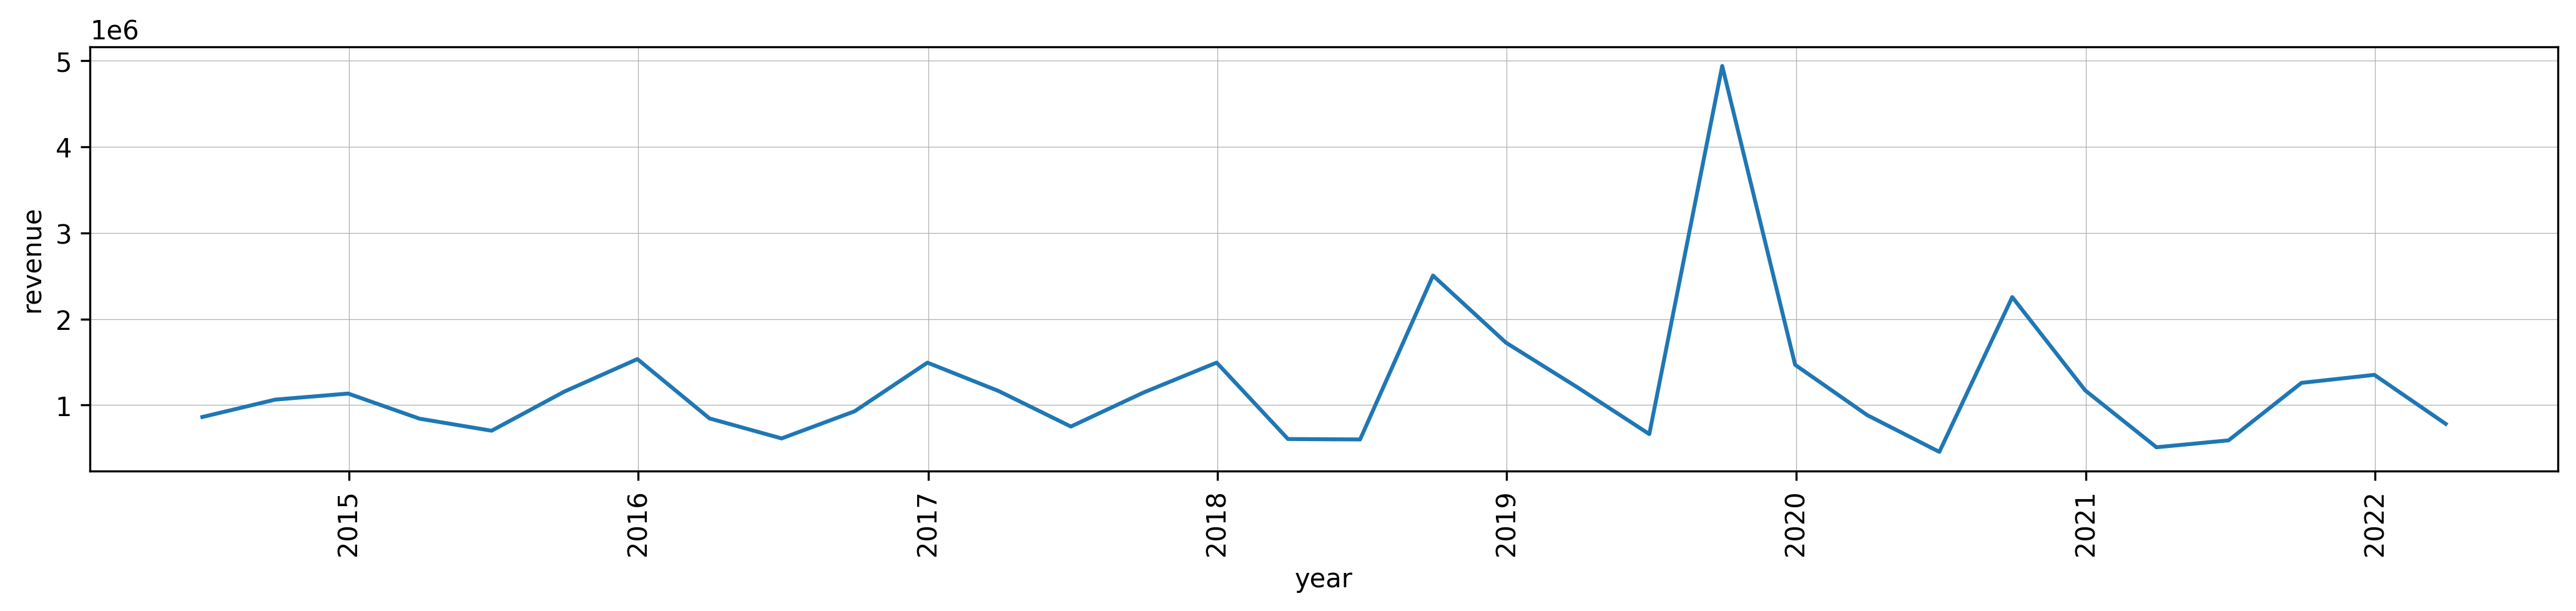

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ts_calcio_trim, x='year', y='revenue',)
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
ts_calcio_annuale["totale_trimestre_prec"] = ts_calcio_annuale["revenue"].shift(+1)
ts_calcio_annuale= ts_calcio_annuale.dropna()
ts_calcio_annuale

Unnamed: 0       year     revenue  totale_trimestre_prec
1           1 2014-09-30  4234959.81             3365712.79
2           2 2014-12-31  3876798.63             4234959.81
3           3 2015-03-31  4552611.48             3876798.63
4           4 2015-06-30  5435884.85             4552611.48
5           5 2015-09-30  8278321.97             5435884.85
6           6 2015-12-31  4764396.03             8278321.97
7           7 2016-03-31  3707615.13             4764396.03
8           8 2016-06-30   800860.61             3707615.13

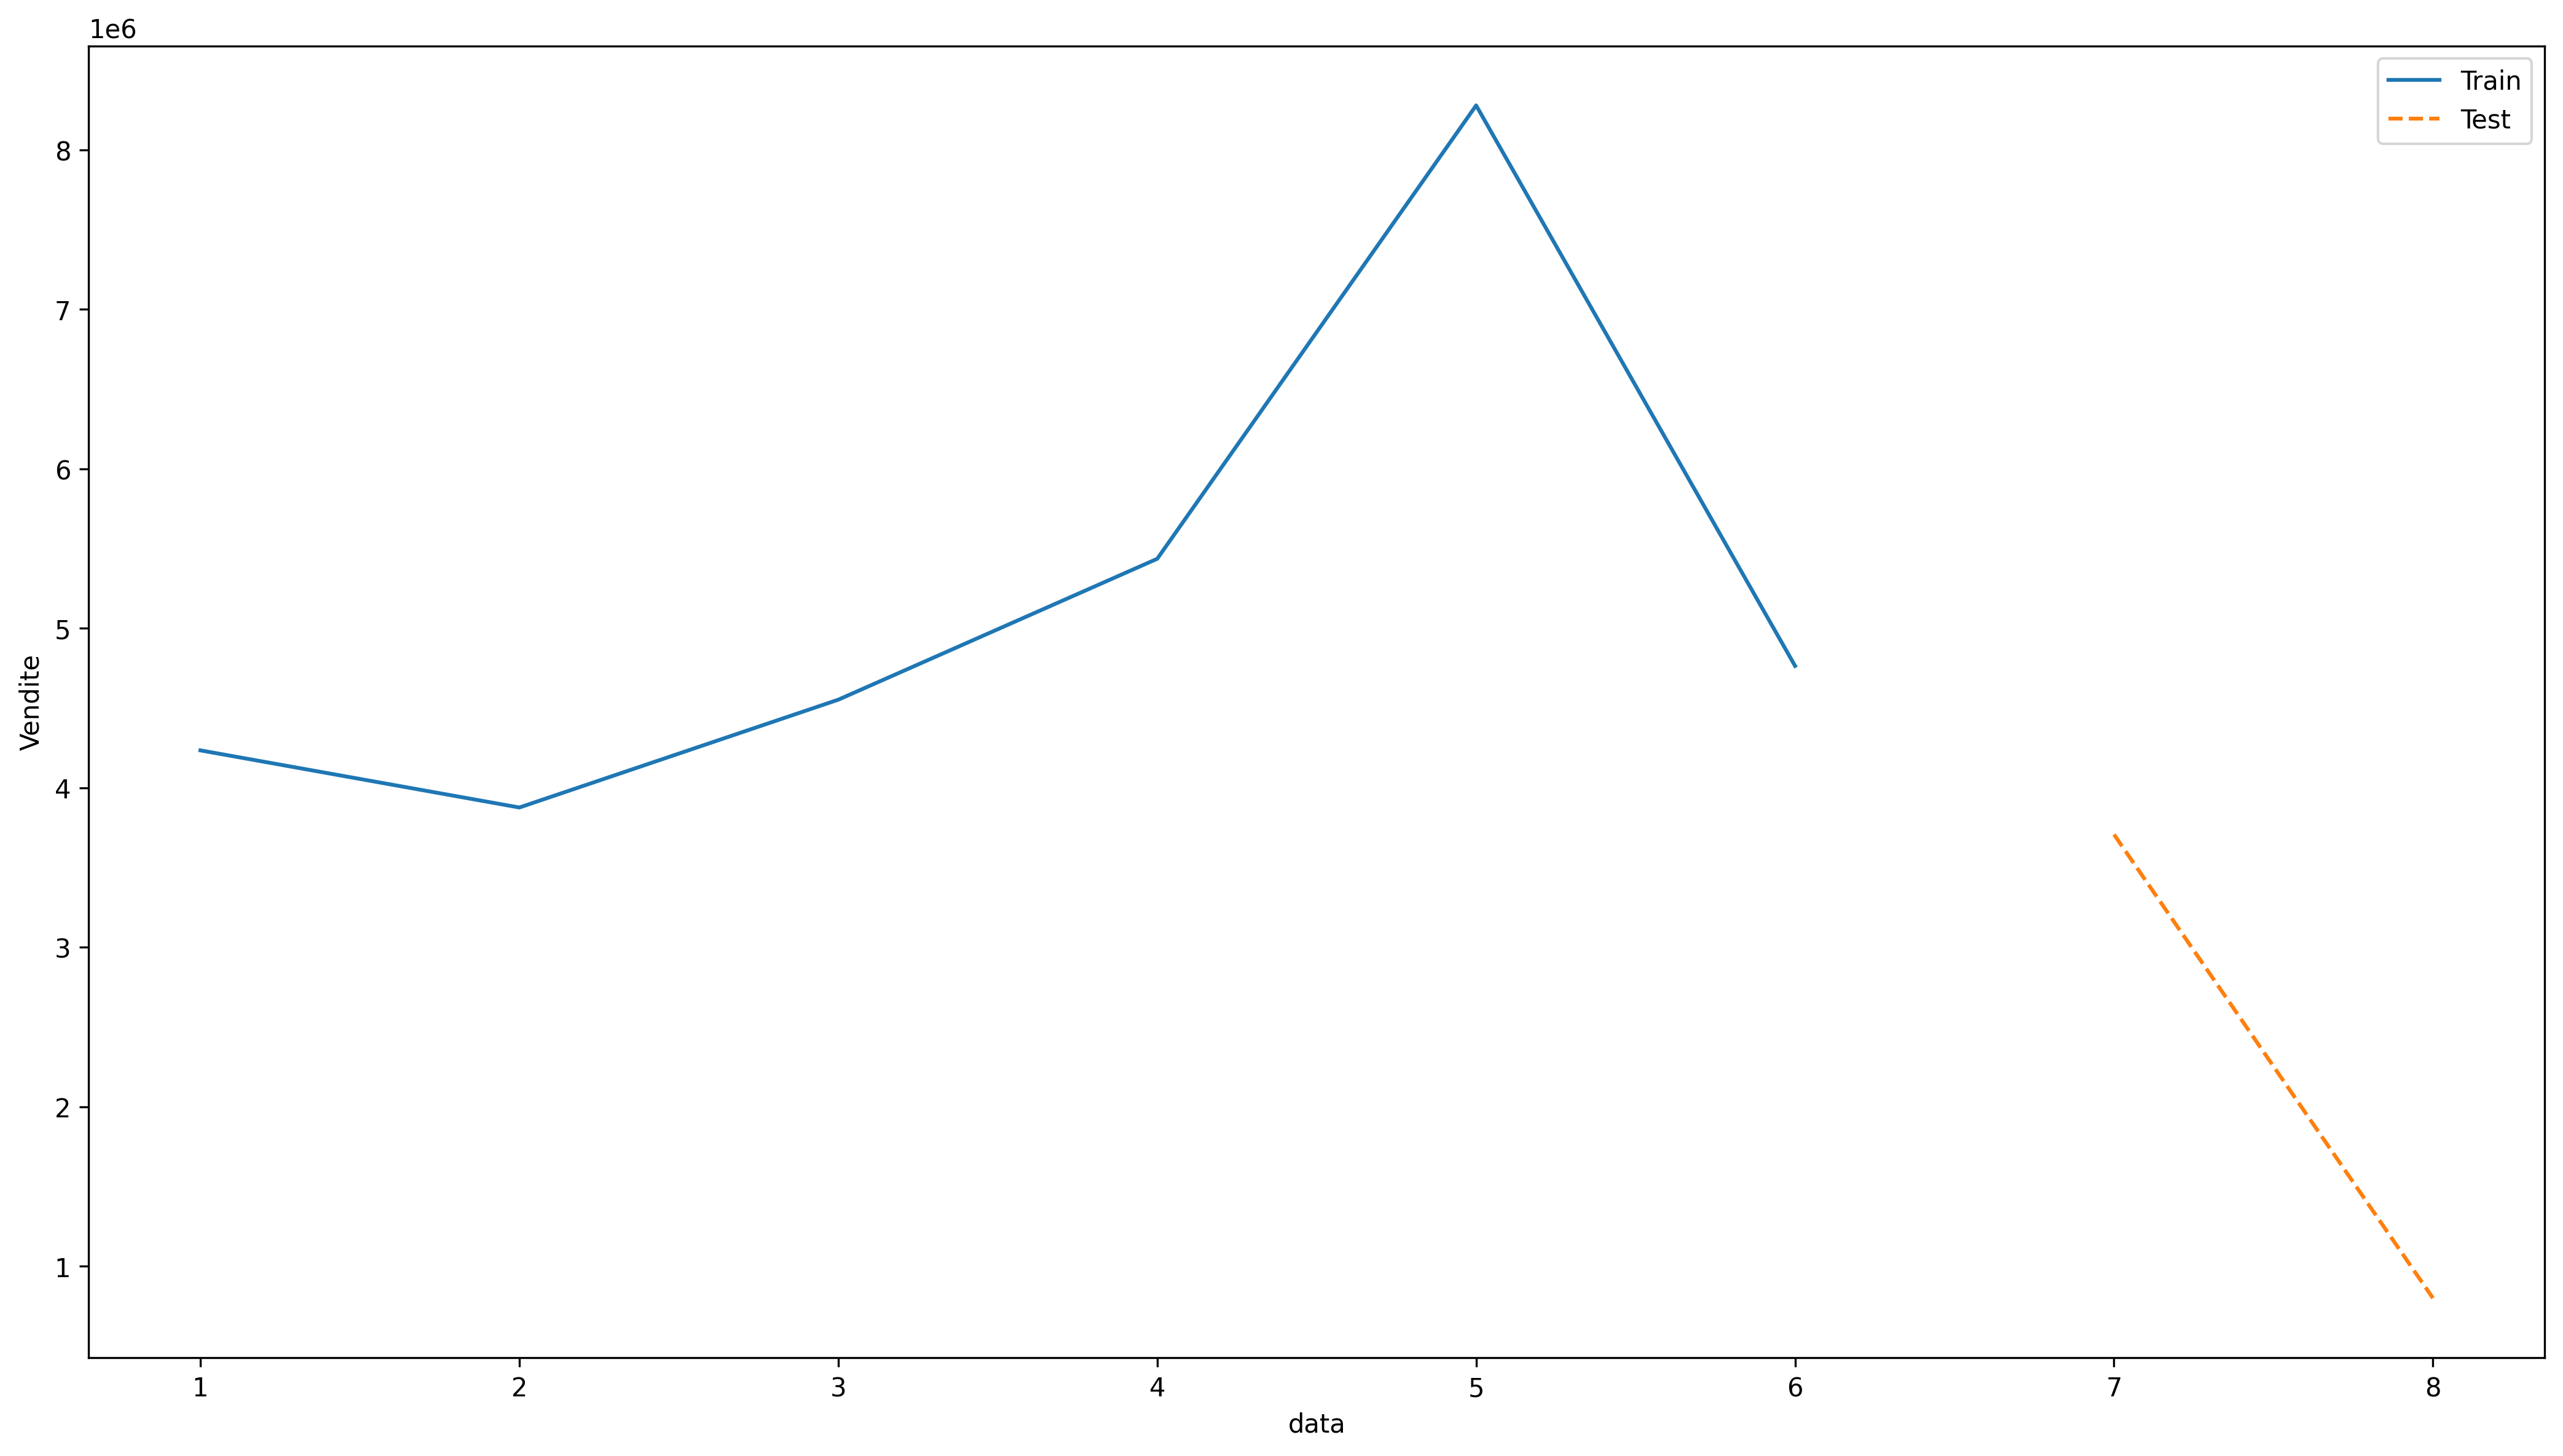

In [ ]:
x_calcio = ts_calcio_annuale[['totale_trimestre_prec']]
x_calcio_to_train = x_calcio.iloc[:(len(x_calcio)-2)]
x_calcio_to_test = x_calcio.iloc[(len(x_calcio)-2):]

y_calcio = ts_calcio_annuale[['revenue']]
y_calcio_to_train = y_calcio.iloc[:(len(y_calcio)-2)]
y_calcio_to_test = y_calcio.iloc[(len(y_calcio)-2):]

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(y_calcio_to_train, ls='-', label='Train')
ax.plot(y_calcio_to_test, ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
estimator_calcio_annuale = XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.01)
estimator_calcio_annuale.fit(x_calcio_to_train, y_calcio_to_train,
              eval_set=[(x_calcio_to_train, y_calcio_to_train), (x_calcio_to_test, y_calcio_to_test)],
              eval_metric='mae')

[0]	validation_0-mae:5.14601e+06	validation_1-mae:2.20975e+06
[1]	validation_0-mae:5.1019e+06	validation_1-mae:2.16564e+06
[2]	validation_0-mae:5.05817e+06	validation_1-mae:2.12191e+06
[3]	validation_0-mae:5.01481e+06	validation_1-mae:2.07855e+06
[4]	validation_0-mae:4.97183e+06	validation_1-mae:2.03557e+06
[5]	validation_0-mae:4.92921e+06	validation_1-mae:1.99295e+06
[6]	validation_0-mae:4.88696e+06	validation_1-mae:1.9507e+06
[7]	validation_0-mae:4.84507e+06	validation_1-mae:1.90881e+06
[8]	validation_0-mae:4.80354e+06	validation_1-mae:1.86729e+06
[9]	validation_0-mae:4.76237e+06	validation_1-mae:1.82611e+06
[10]	validation_0-mae:4.72155e+06	validation_1-mae:1.78529e+06
[11]	validation_0-mae:4.68108e+06	validation_1-mae:1.74482e+06
[12]	validation_0-mae:4.64096e+06	validation_1-mae:1.7047e+06
[13]	validation_0-mae:4.60118e+06	validation_1-mae:1.66492e+06
[14]	validation_0-mae:4.56174e+06	validation_1-mae:1.62548e+06
[15]	validation_0-mae:4.52264e+06	validation_1-mae:1.58638e+06
[16]	

XGBRegressor(learning_rate=0.01, n_estimators=500, objective='reg:squarederror')

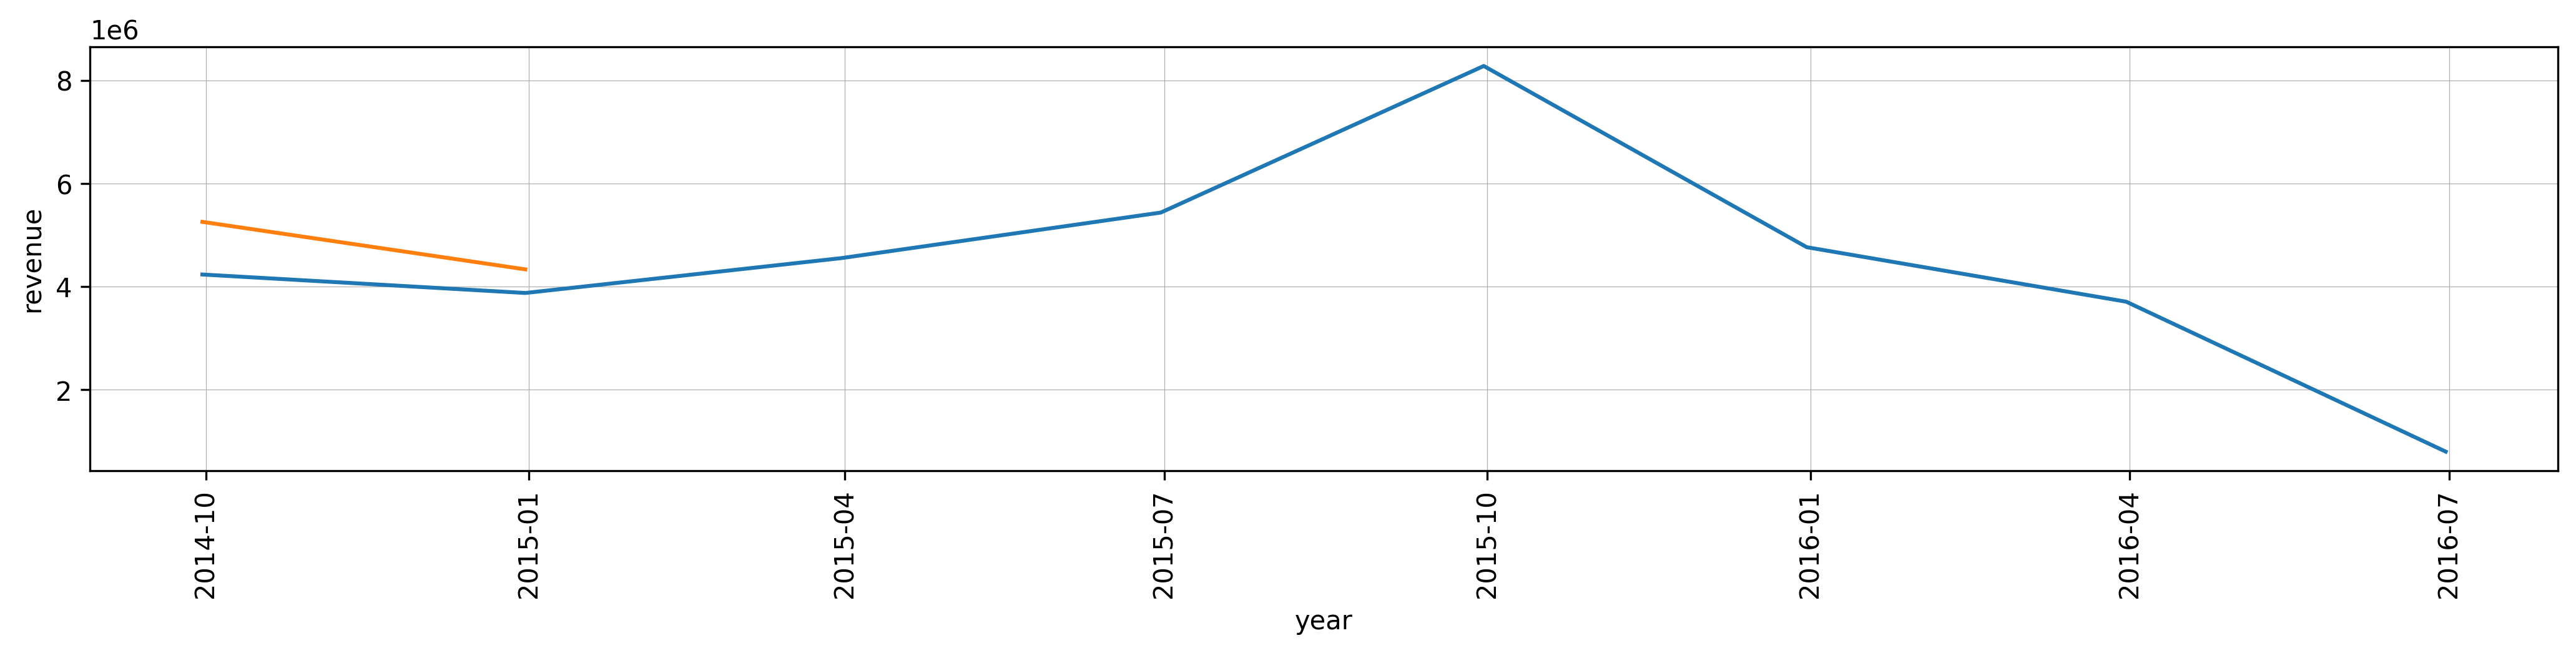

In [ ]:
predictions = estimator_calcio_annuale.predict(x_calcio_to_test)

ts_calcio_annuale = ts_calcio_annuale.reset_index().drop('index', axis=1)
ts_calcio_annuale['predictions'] = pd.Series(predictions)

plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ts_calcio_annuale, x= "year", y='revenue')
sns.lineplot(data=ts_calcio_annuale, x='year', y='predictions', palette= "red")
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
ts_calcio_annuale

Unnamed: 0       year     revenue  totale_trimestre_prec  predictions
0           1 2014-09-30  4234959.81             3365712.79    5255846.0
1           2 2014-12-31  3876798.63             4234959.81    4334494.0
2           3 2015-03-31  4552611.48             3876798.63          NaN
3           4 2015-06-30  5435884.85             4552611.48          NaN
4           5 2015-09-30  8278321.97             5435884.85          NaN
5           6 2015-12-31  4764396.03             8278321.97          NaN
6           7 2016-03-31  3707615.13             4764396.03          NaN
7           8 2016-06-30   800860.61             3707615.13          NaN

In [ ]:
###########################################
#####_Dal_video_di_CodeEmporium_###########
#####_Per_usare_le_Query_SQL###############
###########################################

In [ ]:
def load_query(path):
    with open (path) as file:       #Per andare fare la lettura del file contenente le query SQL
      return file.read

In [ ]:
#query = load_query("specificare un percorso di un file .sql")
#vendite_giornaliere = pysqldf(query)
#vendite_giornaliere.sample(2)